In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import librosa
import pandas as pd

# Define the base directory on Google Drive
data_dir = '/content/drive/MyDrive/CNIT581-Practicum1'

# List of class folders for segmented clips
class_folders = [
    'Barkbeetle_segments',
    'Cicada_segments',
    'Cricket_segments',
    'Termite_segments'
]

# Prepare a list to store segment lengths
lengths = []

# Iterate over each class folder to calculate segment lengths
for cls in class_folders:
    folder_path = os.path.join(data_dir, cls)
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.wav'):  # Adjust if files are in a different audio format
            file_path = os.path.join(folder_path, file_name)
            audio, sr = librosa.load(file_path, sr=None)
            duration = librosa.get_duration(y=audio, sr=sr)
            lengths.append({'Class': cls, 'Length (seconds)': duration})

# Create a DataFrame from the lengths data
df_lengths = pd.DataFrame(lengths)

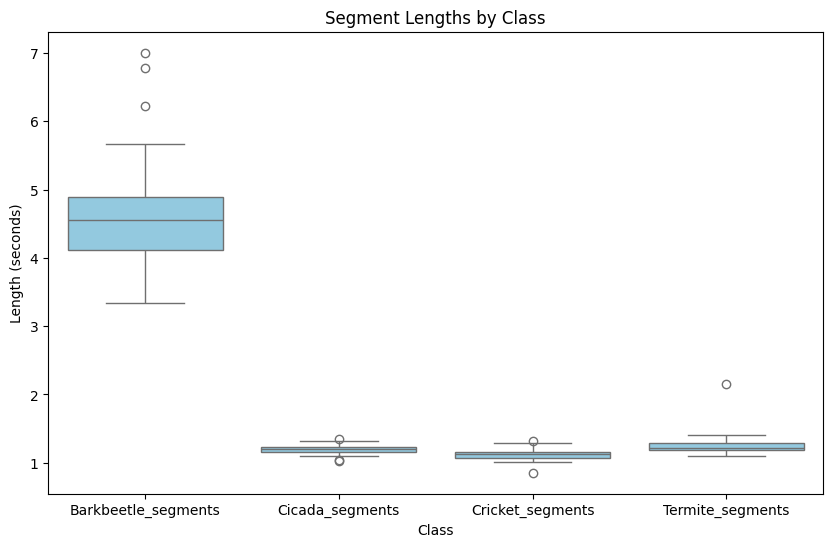

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot with skyblue color
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Length (seconds)', data=df_lengths, color='skyblue')
plt.title('Segment Lengths by Class')
plt.show()

In [5]:
import os
import librosa
import pandas as pd

# Define the base directory on Google Drive
data_dir = '/content/drive/MyDrive/CNIT581-Practicum1'

# List of class folders for segmented clips
class_folders = [
    'Barkbeetle_segments',
    'Cicada_segments',
    'Cricket_segments',
    'Termite_segments'
]

# Dictionary to store total duration per class
total_duration_per_class = {}

# Iterate over each class folder to calculate total duration
for cls in class_folders:
    folder_path = os.path.join(data_dir, cls)
    total_duration = 0
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.wav'):  # Adjust if files are in a different audio format
            file_path = os.path.join(folder_path, file_name)
            audio, sr = librosa.load(file_path, sr=None)
            duration = librosa.get_duration(y=audio, sr=sr)
            total_duration += duration
    total_duration_per_class[cls] = total_duration

# Convert to DataFrame for easy viewing
df_total_duration = pd.DataFrame(list(total_duration_per_class.items()), columns=['Class', 'Total Duration (seconds)'])
print(df_total_duration)


                 Class  Total Duration (seconds)
0  Barkbeetle_segments                155.130227
1      Cicada_segments                 42.942766
2     Cricket_segments                 33.749909
3     Termite_segments                 46.512381


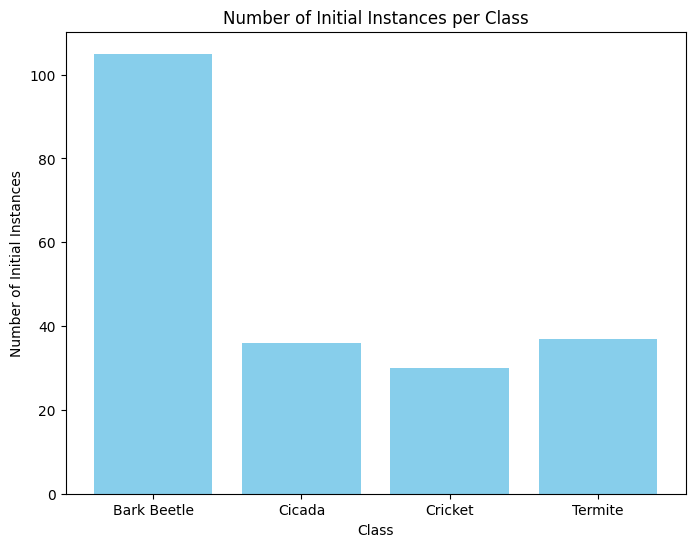

In [6]:
import matplotlib.pyplot as plt

# Data for the number of initial instances
classes = ['Bark Beetle', 'Cicada', 'Cricket', 'Termite']
instances = [105, 36, 30, 37]

# Plotting the bar graph with skyblue color
plt.figure(figsize=(8, 6))
plt.bar(classes, instances, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Initial Instances')
plt.title('Number of Initial Instances per Class')
plt.show()

In [7]:
import os

# Define the base directory on Google Drive
data_dir = '/content/drive/MyDrive/CNIT581-Practicum1'

# List of class folders for instances
class_folders = [
    'barkbeetle_instances',
    'Cicada_instances',
    'Cricket_instances',
    'Termite_instances'
]

# Dictionary to store counts of instances per class
instance_counts = {}

# Iterate over each class folder to count instances
for cls in class_folders:
    folder_path = os.path.join(data_dir, cls)
    # Count the number of .wav files in the folder
    num_files = len([file for file in os.listdir(folder_path) if file.endswith('.wav')])
    instance_counts[cls] = num_files

# Print the instance counts
for cls, count in instance_counts.items():
    print(f'Class: {cls}, Number of Instances: {count}')

Class: barkbeetle_instances, Number of Instances: 30
Class: Cicada_instances, Number of Instances: 30
Class: Cricket_instances, Number of Instances: 30
Class: Termite_instances, Number of Instances: 30


In [8]:
import os
import librosa
import pandas as pd

# Define the base directory on Google Drive
data_dir = '/content/drive/MyDrive/CNIT581-Practicum1'

# List of class folders for 1-second audio clips (assuming separate instance folders)
instance_folders = [
    'barkbeetle_instances',  # Update with the correct path for the instances
    'Cicada_instances',
    'Cricket_instances',
    'Termite_instances'
]

# Prepare a list to store MFCC features
mfcc_features = []

# Iterate over each instance folder to extract MFCC features
for cls in instance_folders:
    folder_path = os.path.join(data_dir, cls)
    instance_count = 0  # Initialize counter for instances

    for file_name in os.listdir(folder_path):
        if file_name.endswith('.wav') and instance_count < 30:  # Process only 30 instances
            file_path = os.path.join(folder_path, file_name)
            audio, sr = librosa.load(file_path, sr=None)

            # Extract 40 MFCC features
            mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
            mfcc_mean = mfcc.mean(axis=1)  # Get mean of each MFCC coefficient
            mfcc_std = mfcc.std(axis=1)  # Get std of each MFCC coefficient

            # Append the features along with the class label to the list
            mfcc_features.append({'Class': cls, 'MFCC_Mean': mfcc_mean, 'MFCC_Std': mfcc_std})

            instance_count += 1  # Increment instance count

# Create a DataFrame from the MFCC features data
df_mfcc = pd.DataFrame(mfcc_features)

# Display the first few rows of the DataFrame
print(df_mfcc.head())

                  Class                                          MFCC_Mean  \
0  barkbeetle_instances  [58.832043, -5.352324, -0.01822238, 0.2257288,...   
1  barkbeetle_instances  [58.876564, -4.5675826, 0.44643423, 0.50020903...   
2  barkbeetle_instances  [57.941097, -6.453536, -1.0425191, 0.116882436...   
3  barkbeetle_instances  [58.888992, -5.7207365, -0.49836454, 0.6334216...   
4  barkbeetle_instances  [59.076576, -5.52666, -0.22286364, 0.4670988, ...   

                                            MFCC_Std  
0  [4.6197624, 4.174839, 3.7208629, 3.5209386, 3....  
1  [5.7183394, 3.5071104, 2.9742205, 3.5413353, 4...  
2  [5.0495963, 2.9913898, 2.7036932, 3.312727, 3....  
3  [5.066152, 3.6250541, 3.514759, 3.4900002, 3.4...  
4  [5.302781, 3.6740172, 2.9689884, 3.876812, 3.8...  


1 FOLD KNN

Accuracy: 1.00
Classification Report:
                      precision    recall  f1-score   support

    Cicada_instances       1.00      1.00      1.00         7
   Cricket_instances       1.00      1.00      1.00         7
   Termite_instances       1.00      1.00      1.00         4
barkbeetle_instances       1.00      1.00      1.00         6

            accuracy                           1.00        24
           macro avg       1.00      1.00      1.00        24
        weighted avg       1.00      1.00      1.00        24



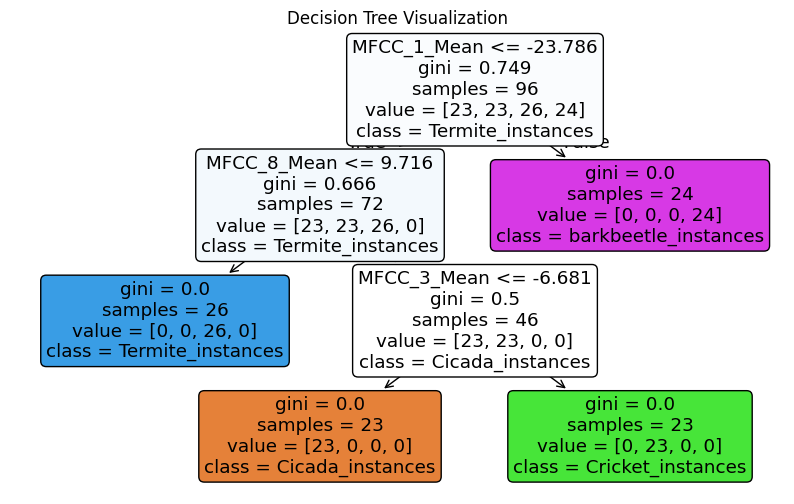

In [9]:
import os
import librosa
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the MFCC DataFrame (assuming df_mfcc is already created)
# If you need to reload it, you can do so by using the code you previously executed.

# Flatten the MFCC Mean and Std arrays into separate columns
mfcc_mean_df = pd.DataFrame(df_mfcc['MFCC_Mean'].tolist())
mfcc_std_df = pd.DataFrame(df_mfcc['MFCC_Std'].tolist())

# Combine the mean and std features with the class labels
X = pd.concat([mfcc_mean_df, mfcc_std_df], axis=1)
X.columns = [f'MFCC_{i+1}_Mean' for i in range(40)] + [f'MFCC_{i+1}_Std' for i in range(40)]
y = df_mfcc['Class']

# Encode the class labels to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Visualizing the Decision Tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=label_encoder.classes_, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


10 FOLD KNN

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(decision_tree, X, y_encoded, cv=10)

# Output cross-validation scores
print(f'10-Fold Cross-Validation Scores: {cv_scores}')
print(f'Average Cross-Validation Accuracy: {np.mean(cv_scores):.2f}')


10-Fold Cross-Validation Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average Cross-Validation Accuracy: 1.00


1 FOLD RANDOM FOREST

Accuracy: 1.00
Classification Report:
                      precision    recall  f1-score   support

    Cicada_instances       1.00      1.00      1.00         7
   Cricket_instances       1.00      1.00      1.00         7
   Termite_instances       1.00      1.00      1.00         4
barkbeetle_instances       1.00      1.00      1.00         6

            accuracy                           1.00        24
           macro avg       1.00      1.00      1.00        24
        weighted avg       1.00      1.00      1.00        24



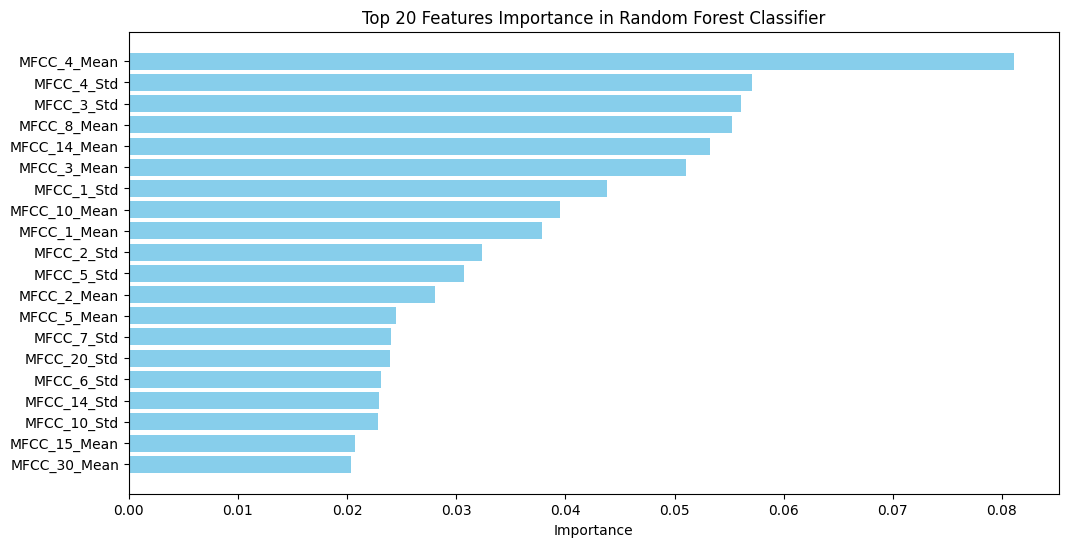

In [11]:
import os
import librosa
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the MFCC DataFrame (assuming df_mfcc is already created)

# Flatten the MFCC Mean and Std arrays into separate columns
mfcc_mean_df = pd.DataFrame(df_mfcc['MFCC_Mean'].tolist())
mfcc_std_df = pd.DataFrame(df_mfcc['MFCC_Std'].tolist())

# Combine the mean and std features with the class labels
X = pd.concat([mfcc_mean_df, mfcc_std_df], axis=1)
X.columns = [f'MFCC_{i+1}_Mean' for i in range(40)] + [f'MFCC_{i+1}_Std' for i in range(40)]
y = df_mfcc['Class']

# Encode the class labels to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Optional: Feature Importance
import matplotlib.pyplot as plt

# Get feature importance
importances = random_forest.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'][:20], feature_importance_df['Importance'][:20], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 20 Features Importance in Random Forest Classifier')
plt.gca().invert_yaxis()
plt.show()

10 FOLD RANDOM FOREST

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(random_forest, X, y_encoded, cv=10)

# Output cross-validation scores
print(f'10-Fold Cross-Validation Scores: {cv_scores}')
print(f'Average Cross-Validation Accuracy: {np.mean(cv_scores):.2f}')


10-Fold Cross-Validation Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average Cross-Validation Accuracy: 1.00


In [13]:
import os
import librosa
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the MFCC DataFrame (assuming df_mfcc is already created)

# Flatten the MFCC Mean and Std arrays into separate columns
mfcc_mean_df = pd.DataFrame(df_mfcc['MFCC_Mean'].tolist())
mfcc_std_df = pd.DataFrame(df_mfcc['MFCC_Std'].tolist())

# Combine the mean and std features with the class labels
X = pd.concat([mfcc_mean_df, mfcc_std_df], axis=1)
X.columns = [f'MFCC_{i+1}_Mean' for i in range(40)] + [f'MFCC_{i+1}_Std' for i in range(40)]
y = df_mfcc['Class']

# Encode the class labels to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the KNN Classifier
k_value = 5  # You can adjust this value based on your needs
knn = KNeighborsClassifier(n_neighbors=k_value)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 1.00
Classification Report:
                      precision    recall  f1-score   support

    Cicada_instances       1.00      1.00      1.00         7
   Cricket_instances       1.00      1.00      1.00         7
   Termite_instances       1.00      1.00      1.00         4
barkbeetle_instances       1.00      1.00      1.00         6

            accuracy                           1.00        24
           macro avg       1.00      1.00      1.00        24
        weighted avg       1.00      1.00      1.00        24



KNN 10 FOLD

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Initialize the KNN Classifier
k_value = 5  # You can adjust this value based on your needs
knn = KNeighborsClassifier(n_neighbors=k_value)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(knn, X, y_encoded, cv=10)

# Output cross-validation scores
print(f'10-Fold Cross-Validation Scores: {cv_scores}')
print(f'Average Cross-Validation Accuracy: {np.mean(cv_scores):.2f}')


10-Fold Cross-Validation Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average Cross-Validation Accuracy: 1.00


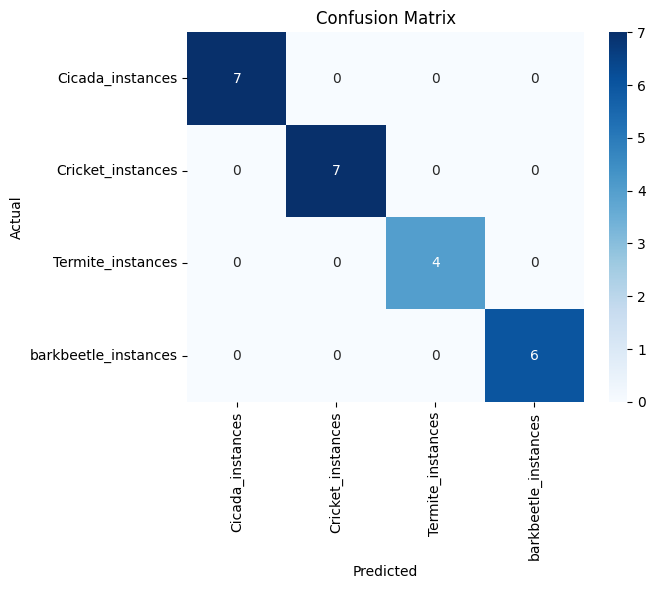

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
from sklearn.model_selection import cross_val_score

# Cross-validation
scores = cross_val_score(knn, X, y_encoded, cv=5)  # Change 'knn' to your model as needed
print(f'Cross-validated accuracy: {scores.mean():.2f} +/- {scores.std():.2f}')

Cross-validated accuracy: 1.00 +/- 0.00


SINGLE FOLD XG BOOST

In [17]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize the XGBoost Classifier without `use_label_encoder`
xgboost_model = xgb.XGBClassifier(eval_metric='mlogloss')

# Train the model
xgboost_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgboost_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb:.2f}')
print('XGBoost Classification Report:')
print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))


XGBoost Accuracy: 1.00
XGBoost Classification Report:
                      precision    recall  f1-score   support

    Cicada_instances       1.00      1.00      1.00         7
   Cricket_instances       1.00      1.00      1.00         7
   Termite_instances       1.00      1.00      1.00         4
barkbeetle_instances       1.00      1.00      1.00         6

            accuracy                           1.00        24
           macro avg       1.00      1.00      1.00        24
        weighted avg       1.00      1.00      1.00        24



5 FOLD XG BOOST

In [18]:
import xgboost as xgb

# Create DMatrix from the data
dtrain = xgb.DMatrix(X, label=y_encoded)

# Set up parameters for the classifier
params = {
    'objective': 'multi:softmax',  # for classification
    'num_class': len(label_encoder.classes_),
    'eval_metric': 'mlogloss'
}

# Perform cross-validation with 5 folds
cv_results = xgb.cv(params, dtrain, num_boost_round=100, nfold=5, seed=42)

# Output cross-validation results
print(cv_results)
print(f'Average cross-validation accuracy: {1 - cv_results["test-mlogloss-mean"].iloc[-1]:.2f}')


    train-mlogloss-mean  train-mlogloss-std  test-mlogloss-mean  \
0              0.904779            0.006603            0.931896   
1              0.631954            0.003325            0.672889   
2              0.455899            0.002268            0.506462   
3              0.335583            0.001829            0.395332   
4              0.250518            0.001612            0.317420   
..                  ...                 ...                 ...   
95             0.019618            0.000119            0.113295   
96             0.019618            0.000119            0.113295   
97             0.019618            0.000119            0.113295   
98             0.019618            0.000119            0.113295   
99             0.019618            0.000119            0.113295   

    test-mlogloss-std  
0            0.029443  
1            0.044084  
2            0.057342  
3            0.067163  
4            0.076364  
..                ...  
95           0.121836  
96 

10 FOLD XG BOOST

In [19]:
import xgboost as xgb

# Create DMatrix from the data
dtrain = xgb.DMatrix(X, label=y_encoded)

# Set up parameters for the classifier
params = {
    'objective': 'multi:softmax',  # for classification
    'num_class': len(label_encoder.classes_),
    'eval_metric': 'mlogloss'
}

# Perform cross-validation with 5 folds
cv_results = xgb.cv(params, dtrain, num_boost_round=100, nfold=10, seed=42)

# Output cross-validation results
print(cv_results)
print(f'Average cross-validation accuracy: {1 - cv_results["test-mlogloss-mean"].iloc[-1]:.2f}')


    train-mlogloss-mean  train-mlogloss-std  test-mlogloss-mean  \
0              0.899647            0.007481            0.926670   
1              0.626928            0.004165            0.669559   
2              0.451421            0.002705            0.505652   
3              0.331557            0.001916            0.396001   
4              0.246893            0.001451            0.317333   
..                  ...                 ...                 ...   
95             0.017396            0.000092            0.107597   
96             0.017396            0.000092            0.107597   
97             0.017396            0.000092            0.107597   
98             0.017396            0.000092            0.107597   
99             0.017396            0.000092            0.107597   

    test-mlogloss-std  
0            0.038010  
1            0.060963  
2            0.080094  
3            0.093641  
4            0.102180  
..                ...  
95           0.135315  
96 

Update 3

In [20]:
import os

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# List the contents of the current directory
print("Contents of the current directory:", os.listdir('.'))


Current Working Directory: /content
Contents of the current directory: ['.config', 'drive', 'sample_data']


In [21]:
import os

# List contents of the Google Drive directory
print("Contents of Google Drive:", os.listdir('/content/drive/MyDrive'))


Contents of Google Drive: ['MANASV_YOGADISHAS', 'dfms1.gdoc', '1614270724841_Manas V shetty (Resume) final (1) (1).pdf', 'PES2201800670_Manas', 'RESUME (1) (4).pdf', 'RESUME (14).pdf', 'RESUME (13).pdf', 'RESUME (12).pdf', 'RESUME (11).pdf', 'RESUME (10).pdf', 'RESUME (9).pdf', 'RESUME (8).pdf', 'RESUME (7).pdf', 'RESUME (6).pdf', 'RESUME (5).pdf', 'RESUME (4).pdf', 'RESUME (3).pdf', 'RESUME (2).pdf', 'RESUME.pdf', 'RESUME (1) (3).pdf', 'HPE Aruba shorltist.xlsx', 'HPE R&D shorltist.xlsx', 'RESUME (1) (2).pdf', 'RESUME (1) (1).pdf', 'RESUME (1).pdf', 'TPM NCG - MAP Bangalore.docx', 'MANAS v shetty (8).pdf', 'MANAS v shetty (7).pdf', 'MANAS v shetty (6).pdf', 'MANAS v shetty (5).pdf', 'MANAS v shetty (4).pdf', 'MANAS v shetty (1) (9).pdf', 'MANAS v shetty (1) (8).pdf', 'MANAS v shetty (1) (7).pdf', 'MANAS v shetty (1) (6).pdf', 'MANAS v shetty (1) (5).pdf', 'MANAS v shetty (1) (4).pdf', 'Copy of PES Application.xlsx', 'MANAS v shetty (1) (3).pdf', 'MANAS v shetty (1) (2).pdf', '16327637

In [22]:
import os

# Define paths to each class's instances folder
class_paths = {
    'Barkbeetle': '/content/drive/MyDrive/CNIT581-Practicum1/Barkbeetle_instances2',
    'Termite': '/content/drive/MyDrive/CNIT581-Practicum1/Termite_instances2',
    'Cicada': '/content/drive/MyDrive/CNIT581-Practicum1/Cicada_instances2',
    'Cricket': '/content/drive/MyDrive/CNIT581-Practicum1/Cricket_instances2'
}
# Check each class folder to see if the files are there
for label, path in class_paths.items():
    print(f"\nChecking files in {label} folder ({path}):")
    for clip in ['clip1', 'clip2', 'clip3', 'clip4', 'clip5']:
        clip_path = os.path.join(path, clip)
        if os.path.isdir(clip_path):
            print(f" - {clip} contents:")
            files = os.listdir(clip_path)
            print(f"   {files if files else 'No files found'}")
        else:
            print(f" - {clip} folder not found.")


Checking files in Barkbeetle folder (/content/drive/MyDrive/CNIT581-Practicum1/Barkbeetle_instances2):
 - clip1 contents:
   ['seg2.wav', 'seg1.wav', 'seg4.wav', 'seg5.wav', 'seg3.wav', 'seg7.wav', 'seg6.wav', 'seg1-2.wav', 'seg2-2.wav', 'seg6-2.wav', 'seg5-2.wav', 'seg3-2.wav', 'seg4-2.wav', 'seg7-2.wav', 'seg2-3.wav', 'seg1-3.wav', 'seg5-3.wav', 'seg3-3.wav', 'seg7-3.wav', 'seg4-3.wav', 'seg6-3.wav']
 - clip2 contents:
   ['seg12.wav', 'seg13.wav', 'seg11.wav', 'seg10.wav', 'seg9.wav', 'seg8.wav', 'seg11-2.wav', 'seg10-2.wav', 'seg12-2.wav', 'seg13-2.wav', 'seg13-3.wav', 'seg11-3.wav', 'seg10-3.wav', 'seg12-3.wav', 'seg8-2.wav', 'seg9-2.wav']
 - clip3 contents:
   ['seg17.wav', 'seg20.wav', 'seg21.wav', 'seg19.wav', 'seg16.wav', 'seg15.wav', 'seg18.wav', 'seg17-2.wav', 'seg18-2.wav', 'seg19-2.wav', 'seg20-2.wav', 'seg21-2.wav', 'seg15-2.wav', 'seg16-2.wav', 'seg19-3.wav', 'seg20-3.wav', 'seg15-3.wav', 'seg21-3.wav', 'seg16-3.wav', 'seg17-3.wav', 'seg18-3.wav']
 - clip4 contents:
   

In [23]:
import librosa
import numpy as np

def load_data(class_paths):
    all_features = []
    all_labels = []

    for label, path in class_paths.items():
        for clip in ['clip1', 'clip2', 'clip3', 'clip4', 'clip5']:
            clip_path = os.path.join(path, clip)
            if os.path.isdir(clip_path):
                for file_name in os.listdir(clip_path):
                    file_path = os.path.join(clip_path, file_name)
                    if file_name.endswith('.wav'):
                        try:
                            print(f"Loading {file_name} from {clip_path}...")
                            audio, sr = librosa.load(file_path, sr=None)
                            mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=20)
                            mfccs_mean = np.mean(mfccs, axis=1)
                            all_features.append(mfccs_mean)
                            all_labels.append(label)
                        except Exception as e:
                            print(f"Error loading {file_path}: {e}")
                    else:
                        print(f"Skipping non-wav file: {file_name}")

    X = np.array(all_features)
    y = np.array(all_labels)
    return X, y

# Run the load function and print shape
X, y = load_data(class_paths)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Loading seg2.wav from /content/drive/MyDrive/CNIT581-Practicum1/Barkbeetle_instances2/clip1...
Loading seg1.wav from /content/drive/MyDrive/CNIT581-Practicum1/Barkbeetle_instances2/clip1...
Loading seg4.wav from /content/drive/MyDrive/CNIT581-Practicum1/Barkbeetle_instances2/clip1...
Loading seg5.wav from /content/drive/MyDrive/CNIT581-Practicum1/Barkbeetle_instances2/clip1...
Loading seg3.wav from /content/drive/MyDrive/CNIT581-Practicum1/Barkbeetle_instances2/clip1...
Loading seg7.wav from /content/drive/MyDrive/CNIT581-Practicum1/Barkbeetle_instances2/clip1...
Loading seg6.wav from /content/drive/MyDrive/CNIT581-Practicum1/Barkbeetle_instances2/clip1...
Loading seg1-2.wav from /content/drive/MyDrive/CNIT581-Practicum1/Barkbeetle_instances2/clip1...
Loading seg2-2.wav from /content/drive/MyDrive/CNIT581-Practicum1/Barkbeetle_instances2/clip1...
Loading seg6-2.wav from /content/drive/MyDrive/CNIT581-Practicum1/Barkbeetle_instances2/clip1...
Loading seg5-2.wav from /content/drive/MyDri

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Define the different conditions for train-test splits
conditions = [
    (['clip1', 'clip2', 'clip3', 'clip4'], 'clip5'),
    (['clip2', 'clip3', 'clip4', 'clip5'], 'clip1'),
    (['clip1', 'clip3', 'clip4', 'clip5'], 'clip2'),
    (['clip1', 'clip2', 'clip4', 'clip5'], 'clip3'),
    (['clip1', 'clip2', 'clip3', 'clip5'], 'clip4')
]

# Function to filter data based on selected clips
def filter_data(X, y, class_paths, train_clips, test_clip):
    X_train, y_train, X_test, y_test = [], [], [], []

    for label, path in class_paths.items():
        for clip in train_clips:
            clip_path = os.path.join(path, clip)
            if os.path.isdir(clip_path):
                for file_name in os.listdir(clip_path):
                    file_path = os.path.join(clip_path, file_name)
                    if file_name.endswith('.wav'):
                        audio, sr = librosa.load(file_path, sr=None)
                        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=20)
                        mfccs_mean = np.mean(mfccs, axis=1)
                        X_train.append(mfccs_mean)
                        y_train.append(label)

        # Test clip
        test_clip_path = os.path.join(path, test_clip)
        if os.path.isdir(test_clip_path):
            for file_name in os.listdir(test_clip_path):
                file_path = os.path.join(test_clip_path, file_name)
                if file_name.endswith('.wav'):
                    audio, sr = librosa.load(file_path, sr=None)
                    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=20)
                    mfccs_mean = np.mean(mfccs, axis=1)
                    X_test.append(mfccs_mean)
                    y_test.append(label)

    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

# Initialize a dictionary to store accuracy for each condition
accuracies = {}

# Loop over each condition and evaluate the Decision Tree model
for i, (train_clips, test_clip) in enumerate(conditions, start=1):
    print(f"\nCondition {i}: Training on {train_clips} and testing on {test_clip}")

    # Filter data for the current train-test split
    X_train, y_train, X_test, y_test = filter_data(X, y, class_paths, train_clips, test_clip)

    # Train the Decision Tree model
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    # Test the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[f'Condition {i}'] = accuracy

    print(f"Accuracy for Condition {i}: {accuracy:.2f}")

# Display the accuracies for all conditions
print("\nSummary of Accuracies:")
for condition, acc in accuracies.items():
    print(f"{condition}: {acc:.2f}")


Condition 1: Training on ['clip1', 'clip2', 'clip3', 'clip4'] and testing on clip5
Accuracy for Condition 1: 0.95

Condition 2: Training on ['clip2', 'clip3', 'clip4', 'clip5'] and testing on clip1
Accuracy for Condition 2: 1.00

Condition 3: Training on ['clip1', 'clip3', 'clip4', 'clip5'] and testing on clip2
Accuracy for Condition 3: 0.90

Condition 4: Training on ['clip1', 'clip2', 'clip4', 'clip5'] and testing on clip3
Accuracy for Condition 4: 0.98

Condition 5: Training on ['clip1', 'clip2', 'clip3', 'clip5'] and testing on clip4
Accuracy for Condition 5: 1.00

Summary of Accuracies:
Condition 1: 0.95
Condition 2: 1.00
Condition 3: 0.90
Condition 4: 0.98
Condition 5: 1.00


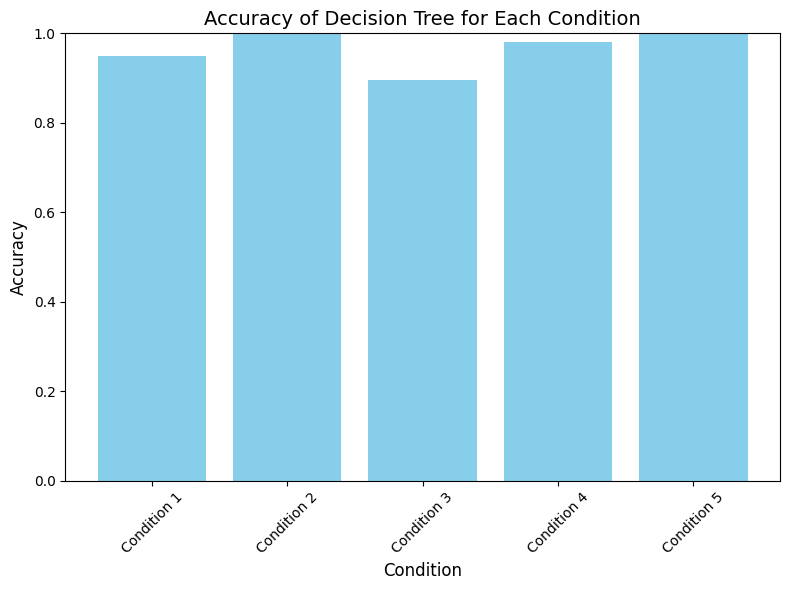

In [25]:
import matplotlib.pyplot as plt

# Plotting the accuracies for each condition
conditions = list(accuracies.keys())
accuracy_values = list(accuracies.values())

plt.figure(figsize=(8, 6))
plt.bar(conditions, accuracy_values, color='skyblue')
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy of Decision Tree for Each Condition', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Define the different conditions for train-test splits
conditions = [
    (['clip1', 'clip2', 'clip3', 'clip4'], 'clip5'),
    (['clip2', 'clip3', 'clip4', 'clip5'], 'clip1'),
    (['clip1', 'clip3', 'clip4', 'clip5'], 'clip2'),
    (['clip1', 'clip2', 'clip4', 'clip5'], 'clip3'),
    (['clip1', 'clip2', 'clip3', 'clip5'], 'clip4')
]

# Function to filter data based on selected clips
def filter_data(X, y, class_paths, train_clips, test_clip):
    X_train, y_train, X_test, y_test = [], [], [], []

    for label, path in class_paths.items():
        for clip in train_clips:
            clip_path = os.path.join(path, clip)
            if os.path.isdir(clip_path):
                for file_name in os.listdir(clip_path):
                    file_path = os.path.join(clip_path, file_name)
                    if file_name.endswith('.wav'):
                        audio, sr = librosa.load(file_path, sr=None)
                        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=10)
                        mfccs_mean = np.mean(mfccs, axis=1)
                        X_train.append(mfccs_mean)
                        y_train.append(label)

        # Test clip
        test_clip_path = os.path.join(path, test_clip)
        if os.path.isdir(test_clip_path):
            for file_name in os.listdir(test_clip_path):
                file_path = os.path.join(test_clip_path, file_name)
                if file_name.endswith('.wav'):
                    audio, sr = librosa.load(file_path, sr=None)
                    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=10)
                    mfccs_mean = np.mean(mfccs, axis=1)
                    X_test.append(mfccs_mean)
                    y_test.append(label)

    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

# Initialize a dictionary to store accuracy for each condition
accuracies = {}

# Loop over each condition and evaluate the Decision Tree model
for i, (train_clips, test_clip) in enumerate(conditions, start=1):
    print(f"\nCondition {i}: Training on {train_clips} and testing on {test_clip}")

    # Filter data for the current train-test split
    X_train, y_train, X_test, y_test = filter_data(X, y, class_paths, train_clips, test_clip)

    # Train the Decision Tree model
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    # Test the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[f'Condition {i}'] = accuracy

    print(f"Accuracy for Condition {i}: {accuracy:.2f}")

# Display the accuracies for all conditions
print("\nSummary of Accuracies:")
for condition, acc in accuracies.items():
    print(f"{condition}: {acc:.2f}")


Condition 1: Training on ['clip1', 'clip2', 'clip3', 'clip4'] and testing on clip5
Accuracy for Condition 1: 0.95

Condition 2: Training on ['clip2', 'clip3', 'clip4', 'clip5'] and testing on clip1
Accuracy for Condition 2: 1.00

Condition 3: Training on ['clip1', 'clip3', 'clip4', 'clip5'] and testing on clip2
Accuracy for Condition 3: 0.79

Condition 4: Training on ['clip1', 'clip2', 'clip4', 'clip5'] and testing on clip3
Accuracy for Condition 4: 0.87

Condition 5: Training on ['clip1', 'clip2', 'clip3', 'clip5'] and testing on clip4
Accuracy for Condition 5: 1.00

Summary of Accuracies:
Condition 1: 0.95
Condition 2: 1.00
Condition 3: 0.79
Condition 4: 0.87
Condition 5: 1.00


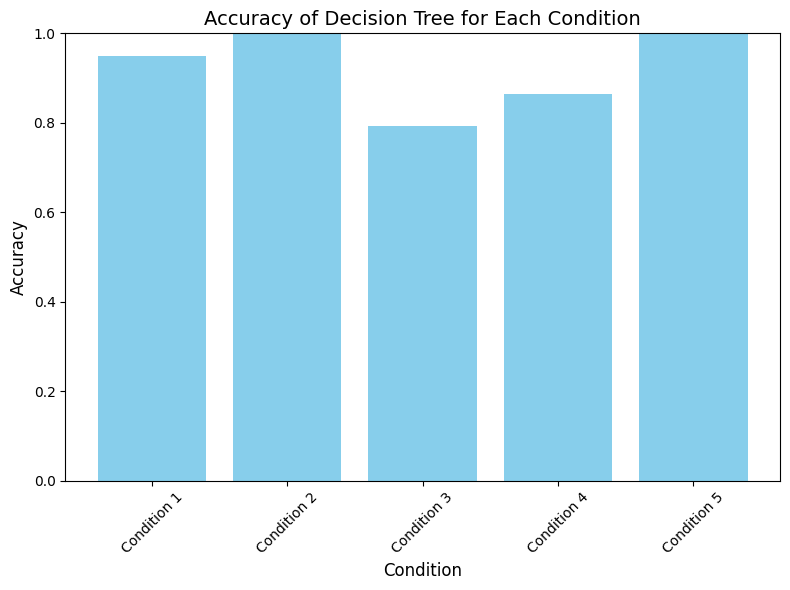

In [27]:
import matplotlib.pyplot as plt

# Plotting the accuracies for each condition
conditions = list(accuracies.keys())
accuracy_values = list(accuracies.values())

plt.figure(figsize=(8, 6))
plt.bar(conditions, accuracy_values, color='skyblue')
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy of Decision Tree for Each Condition', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Define the different conditions for train-test splits
conditions = [
    (['clip1', 'clip2', 'clip3', 'clip4'], 'clip5'),
    (['clip2', 'clip3', 'clip4', 'clip5'], 'clip1'),
    (['clip1', 'clip3', 'clip4', 'clip5'], 'clip2'),
    (['clip1', 'clip2', 'clip4', 'clip5'], 'clip3'),
    (['clip1', 'clip2', 'clip3', 'clip5'], 'clip4')
]

# Function to filter data based on selected clips
def filter_data(X, y, class_paths, train_clips, test_clip):
    X_train, y_train, X_test, y_test = [], [], [], []

    for label, path in class_paths.items():
        for clip in train_clips:
            clip_path = os.path.join(path, clip)
            if os.path.isdir(clip_path):
                for file_name in os.listdir(clip_path):
                    file_path = os.path.join(clip_path, file_name)
                    if file_name.endswith('.wav'):
                        audio, sr = librosa.load(file_path, sr=None)
                        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=30)
                        mfccs_mean = np.mean(mfccs, axis=1)
                        X_train.append(mfccs_mean)
                        y_train.append(label)

        # Test clip
        test_clip_path = os.path.join(path, test_clip)
        if os.path.isdir(test_clip_path):
            for file_name in os.listdir(test_clip_path):
                file_path = os.path.join(test_clip_path, file_name)
                if file_name.endswith('.wav'):
                    audio, sr = librosa.load(file_path, sr=None)
                    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=30)
                    mfccs_mean = np.mean(mfccs, axis=1)
                    X_test.append(mfccs_mean)
                    y_test.append(label)

    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

# Initialize a dictionary to store accuracy for each condition
accuracies = {}

# Loop over each condition and evaluate the Decision Tree model
for i, (train_clips, test_clip) in enumerate(conditions, start=1):
    print(f"\nCondition {i}: Training on {train_clips} and testing on {test_clip}")

    # Filter data for the current train-test split
    X_train, y_train, X_test, y_test = filter_data(X, y, class_paths, train_clips, test_clip)

    # Train the Decision Tree model
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    # Test the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[f'Condition {i}'] = accuracy

    print(f"Accuracy for Condition {i}: {accuracy:.2f}")

# Display the accuracies for all conditions
print("\nSummary of Accuracies:")
for condition, acc in accuracies.items():
    print(f"{condition}: {acc:.2f}")


Condition 1: Training on ['clip1', 'clip2', 'clip3', 'clip4'] and testing on clip5
Accuracy for Condition 1: 0.95

Condition 2: Training on ['clip2', 'clip3', 'clip4', 'clip5'] and testing on clip1
Accuracy for Condition 2: 0.79

Condition 3: Training on ['clip1', 'clip3', 'clip4', 'clip5'] and testing on clip2
Accuracy for Condition 3: 0.86

Condition 4: Training on ['clip1', 'clip2', 'clip4', 'clip5'] and testing on clip3
Accuracy for Condition 4: 1.00

Condition 5: Training on ['clip1', 'clip2', 'clip3', 'clip5'] and testing on clip4
Accuracy for Condition 5: 1.00

Summary of Accuracies:
Condition 1: 0.95
Condition 2: 0.79
Condition 3: 0.86
Condition 4: 1.00
Condition 5: 1.00


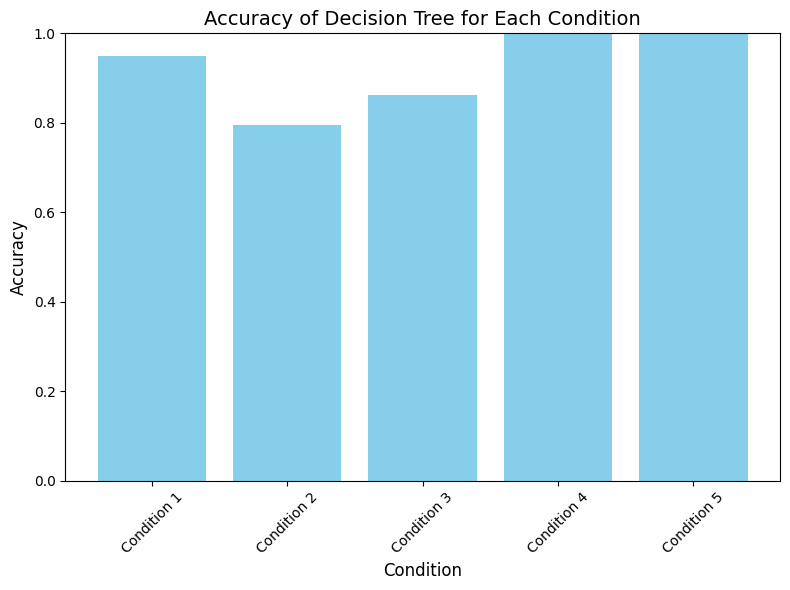

In [29]:
import matplotlib.pyplot as plt

# Plotting the accuracies for each condition
conditions = list(accuracies.keys())
accuracy_values = list(accuracies.values())

plt.figure(figsize=(8, 6))
plt.bar(conditions, accuracy_values, color='skyblue')
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy of Decision Tree for Each Condition', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Define the different conditions for train-test splits
conditions = [
    (['clip1', 'clip2', 'clip3', 'clip4'], 'clip5'),
    (['clip2', 'clip3', 'clip4', 'clip5'], 'clip1'),
    (['clip1', 'clip3', 'clip4', 'clip5'], 'clip2'),
    (['clip1', 'clip2', 'clip4', 'clip5'], 'clip3'),
    (['clip1', 'clip2', 'clip3', 'clip5'], 'clip4')
]

# Function to filter data based on selected clips
def filter_data(X, y, class_paths, train_clips, test_clip):
    X_train, y_train, X_test, y_test = [], [], [], []

    for label, path in class_paths.items():
        for clip in train_clips:
            clip_path = os.path.join(path, clip)
            if os.path.isdir(clip_path):
                for file_name in os.listdir(clip_path):
                    file_path = os.path.join(clip_path, file_name)
                    if file_name.endswith('.wav'):
                        audio, sr = librosa.load(file_path, sr=None)
                        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
                        mfccs_mean = np.mean(mfccs, axis=1)
                        X_train.append(mfccs_mean)
                        y_train.append(label)

        # Test clip
        test_clip_path = os.path.join(path, test_clip)
        if os.path.isdir(test_clip_path):
            for file_name in os.listdir(test_clip_path):
                file_path = os.path.join(test_clip_path, file_name)
                if file_name.endswith('.wav'):
                    audio, sr = librosa.load(file_path, sr=None)
                    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
                    mfccs_mean = np.mean(mfccs, axis=1)
                    X_test.append(mfccs_mean)
                    y_test.append(label)

    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

# Initialize a dictionary to store accuracy for each condition
accuracies = {}

# Loop over each condition and evaluate the Decision Tree model
for i, (train_clips, test_clip) in enumerate(conditions, start=1):
    print(f"\nCondition {i}: Training on {train_clips} and testing on {test_clip}")

    # Filter data for the current train-test split
    X_train, y_train, X_test, y_test = filter_data(X, y, class_paths, train_clips, test_clip)

    # Train the Decision Tree model
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    # Test the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[f'Condition {i}'] = accuracy

    print(f"Accuracy for Condition {i}: {accuracy:.2f}")

# Display the accuracies for all conditions
print("\nSummary of Accuracies:")
for condition, acc in accuracies.items():
    print(f"{condition}: {acc:.2f}")


Condition 1: Training on ['clip1', 'clip2', 'clip3', 'clip4'] and testing on clip5
Accuracy for Condition 1: 0.95

Condition 2: Training on ['clip2', 'clip3', 'clip4', 'clip5'] and testing on clip1
Accuracy for Condition 2: 1.00

Condition 3: Training on ['clip1', 'clip3', 'clip4', 'clip5'] and testing on clip2
Accuracy for Condition 3: 0.86

Condition 4: Training on ['clip1', 'clip2', 'clip4', 'clip5'] and testing on clip3
Accuracy for Condition 4: 1.00

Condition 5: Training on ['clip1', 'clip2', 'clip3', 'clip5'] and testing on clip4
Accuracy for Condition 5: 1.00

Summary of Accuracies:
Condition 1: 0.95
Condition 2: 1.00
Condition 3: 0.86
Condition 4: 1.00
Condition 5: 1.00


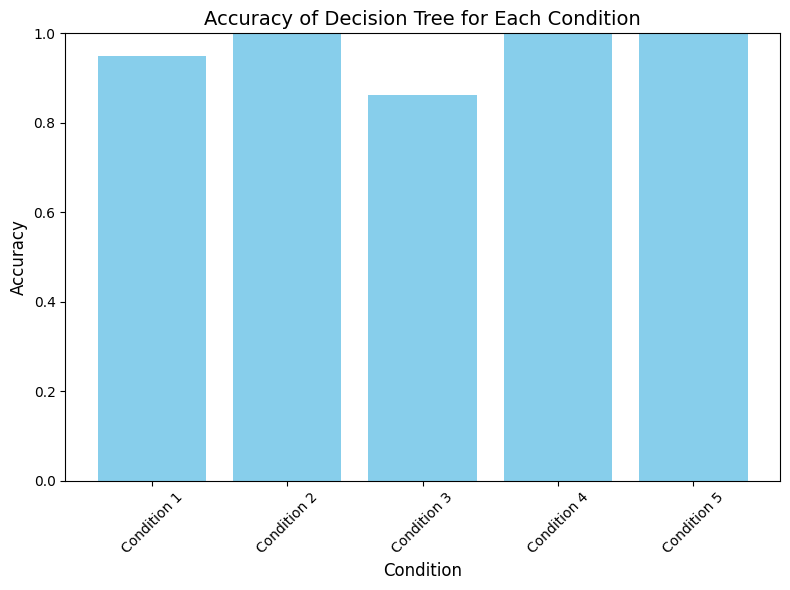

In [31]:
import matplotlib.pyplot as plt

# Plotting the accuracies for each condition
conditions = list(accuracies.keys())
accuracy_values = list(accuracies.values())

plt.figure(figsize=(8, 6))
plt.bar(conditions, accuracy_values, color='skyblue')
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy of Decision Tree for Each Condition', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

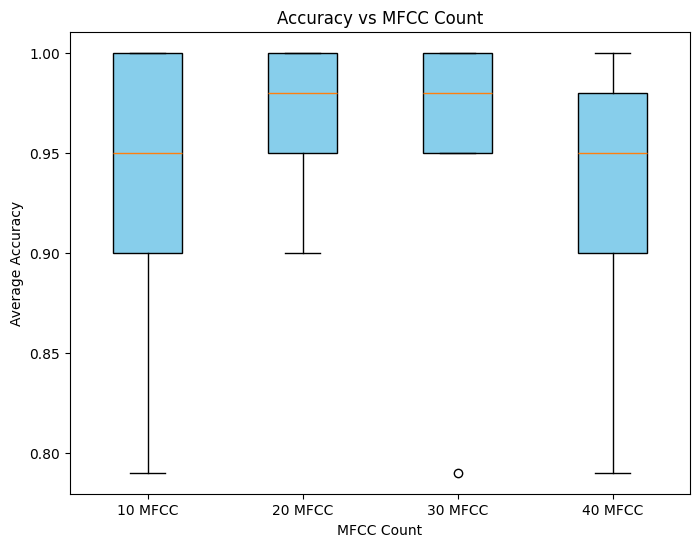

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for accuracies (you can replace this with your actual results)
accuracies_10 = [0.95, 0.79, 0.90, 1.00, 1.00]  # Replace with your results for 10 MFCC
accuracies_20 = [0.95, 1.00, 0.90, 0.98, 1.00]  # Replace with your results for 20 MFCC
accuracies_30 = [0.95, 0.79, 1.00, 0.98, 1.00]  # Replace with your results for 30 MFCC
accuracies_40 = [0.95, 0.79, 0.90, 0.98, 1.00]  # Replace with your results for 40 MFCC

# Organize the data for plotting
data = [accuracies_10, accuracies_20, accuracies_30, accuracies_40]
labels = ['10 MFCC', '20 MFCC', '30 MFCC', '40 MFCC']

# Create the boxplot with skyblue color
plt.figure(figsize=(8, 6))
box = plt.boxplot(data, labels=labels, patch_artist=True)

# Set color for the boxes
for patch in box['boxes']:
    patch.set_facecolor('skyblue')

# Add labels and title
plt.ylabel('Average Accuracy')
plt.xlabel('MFCC Count')
plt.title('Accuracy vs MFCC Count')

# Show the plot
plt.show()

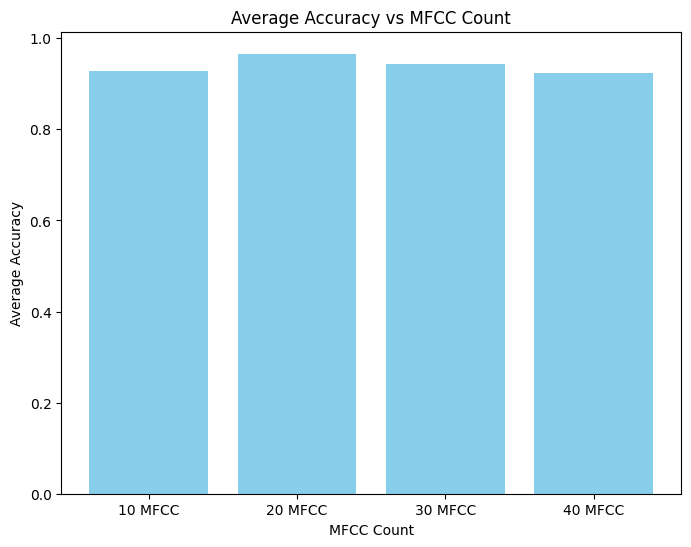

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for accuracies (you can replace this with your actual results)
accuracies_10 = [0.95, 0.79, 0.90, 1.00, 1.00]  # Replace with your results for 10 MFCC
accuracies_20 = [0.95, 1.00, 0.90, 0.98, 1.00]  # Replace with your results for 20 MFCC
accuracies_30 = [0.95, 0.79, 1.00, 0.98, 1.00]  # Replace with your results for 30 MFCC
accuracies_40 = [0.95, 0.79, 0.90, 0.98, 1.00]  # Replace with your results for 40 MFCC

# Calculate mean accuracy for each MFCC count
means = [np.mean(accuracies_10), np.mean(accuracies_20), np.mean(accuracies_30), np.mean(accuracies_40)]
labels = ['10 MFCC', '20 MFCC', '30 MFCC', '40 MFCC']

# Create the bar plot with skyblue color
plt.figure(figsize=(8, 6))
plt.bar(labels, means, color='skyblue')

# Add labels and title
plt.ylabel('Average Accuracy')
plt.xlabel('MFCC Count')
plt.title('Average Accuracy vs MFCC Count')

# Show the plot
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
<ipython-input-34-7918af9aaae2>:66: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


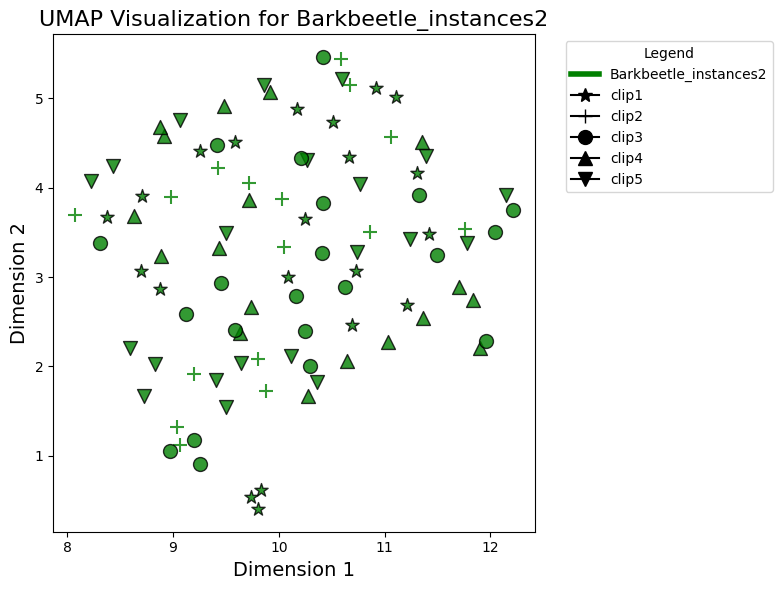

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
<ipython-input-34-7918af9aaae2>:66: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


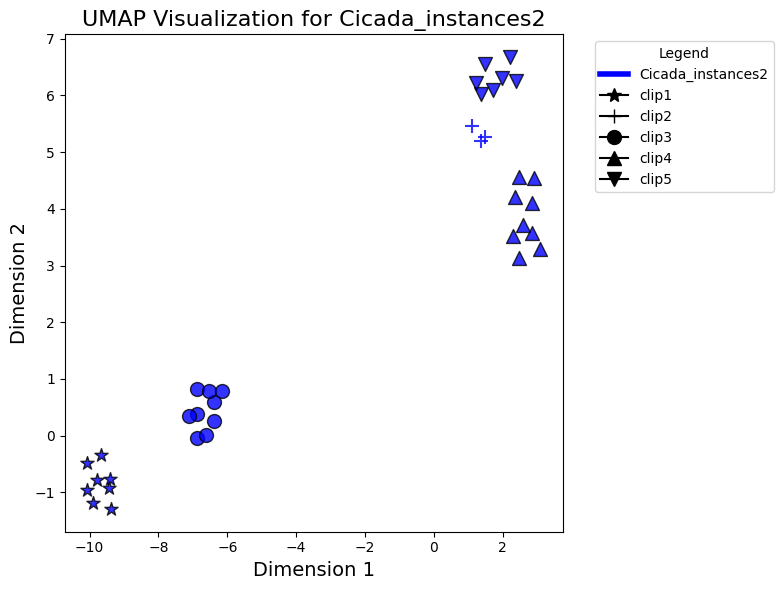

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
<ipython-input-34-7918af9aaae2>:66: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


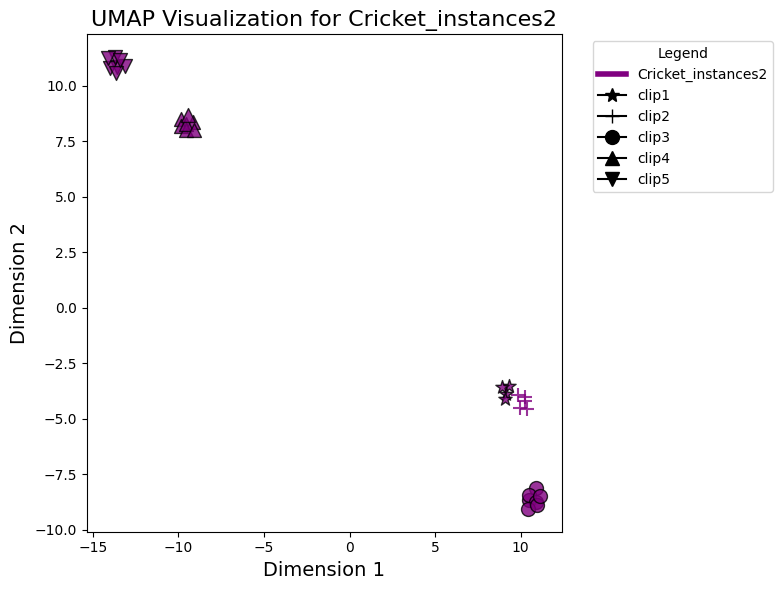

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
<ipython-input-34-7918af9aaae2>:66: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


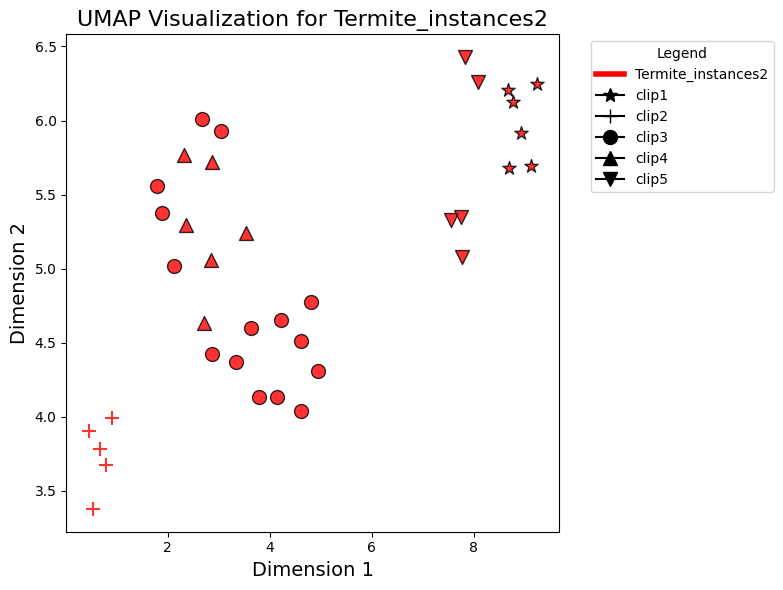

In [34]:
!pip install umap-learn
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
import umap
from matplotlib.lines import Line2D

# Path to your folders on Google Drive
base_path = '/content/drive/MyDrive/CNIT581-Practicum1'
classes = ["Barkbeetle_instances2", "Cicada_instances2", "Cricket_instances2", "Termite_instances2"]

# Define the color and marker scheme
class_colors = {
    "Cicada_instances2": "blue",
    "Barkbeetle_instances2": "green",
    "Termite_instances2": "red",
    "Cricket_instances2": "purple"
}
clip_markers = {
    "clip1": "*",  # Star
    "clip2": "+",  # Plus
    "clip3": "o",  # Circle
    "clip4": "^",  # Triangle Up
    "clip5": "v"   # Triangle Down
}

# Function to extract MFCC features
def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)  # 40 MFCCs
        return np.mean(mfccs.T, axis=0)
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Collecting features for each class
class_features = {}
for insect_class in classes:
    features = []
    clip_labels = []
    class_path = os.path.join(base_path, insect_class)
    for clip_folder in os.listdir(class_path):
        clip_path = os.path.join(class_path, clip_folder)
        if os.path.isdir(clip_path):
            for file_name in os.listdir(clip_path):
                file_path = os.path.join(clip_path, file_name)
                if file_name.endswith(".wav"):  # Assuming audio files are .wav
                    feature = extract_features(file_path)
                    if feature is not None:
                        features.append(feature)
                        clip_labels.append(clip_folder)  # Use the clip# as legend
    class_features[insect_class] = (np.array(features), clip_labels)

# Function to plot UMAP for a single class with specified color and marker
def plot_umap(features, clip_labels, class_name):
    reducer = umap.UMAP(n_components=2, random_state=42)
    reduced_features = reducer.fit_transform(features)

    # Plotting
    plt.figure(figsize=(8, 6))
    for i, (x, y) in enumerate(reduced_features):
        clip_label = clip_labels[i]
        marker = clip_markers.get(clip_label, "o")  # Default to circle if unknown clip
        plt.scatter(
            x, y,
            c=class_colors[class_name],  # Assign the color for the class
            marker=marker,
            edgecolor="black",
            s=100,
            alpha=0.8,
            label=clip_label if i == 0 else ""  # Avoid duplicate labels in legend
        )

    # Custom legends
    class_legend = Line2D([0], [0], color=class_colors[class_name], lw=4, label=class_name)
    clip_legend = [Line2D([0], [0], color='black', marker=m, markersize=10, label=clip)
                   for clip, m in clip_markers.items()]

    plt.legend(handles=[class_legend] + clip_legend, bbox_to_anchor=(1.05, 1), loc="upper left", title="Legend")
    plt.title(f"UMAP Visualization for {class_name}", fontsize=16)
    plt.xlabel("Dimension 1", fontsize=14)
    plt.ylabel("Dimension 2", fontsize=14)
    plt.tight_layout()
    plt.show()

# Generating UMAP plots for each class
for insect_class, (features, clip_labels) in class_features.items():
    if features.size > 0:  # Ensure features are available
        plot_umap(features, clip_labels, insect_class)

Sum of importance scores for 10 MFCC: 1.00
Sum of importance scores for 20 MFCC: 1.00
Sum of importance scores for 30 MFCC: 1.00
Sum of importance scores for 40 MFCC: 1.00


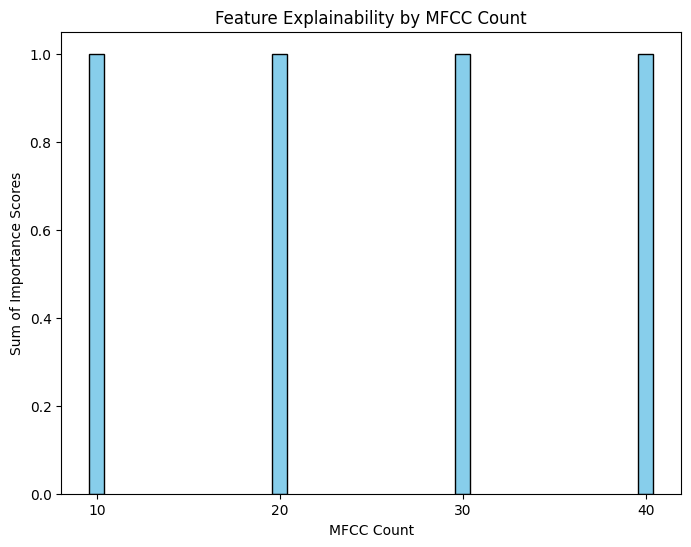

In [35]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Path to your folders on Google Drive
base_path = '/content/drive/MyDrive/CNIT581-Practicum1'
classes = ["Barkbeetle_instances2", "Cicada_instances2", "Cricket_instances2", "Termite_instances2"]

# Define a function to load all .wav files from the given folder structure
def load_audio_and_labels(base_path, classes):
    audio_clips = []
    labels = []
    for label, class_name in enumerate(classes):
        class_folder = os.path.join(base_path, class_name)
        for clip_folder in os.listdir(class_folder):
            clip_path = os.path.join(class_folder, clip_folder)
            if os.path.isdir(clip_path):  # Ensure it's a folder
                for file in os.listdir(clip_path):
                    if file.endswith('.wav'):
                        audio_clips.append(os.path.join(clip_path, file))
                        labels.append(label)
    return audio_clips, labels

# Load the audio clips and labels
audio_clips, labels = load_audio_and_labels(base_path, classes)

# Define a function to extract MFCC features
def extract_mfcc_features(audio_clips, n_mfcc):
    features = []
    for clip in audio_clips:
        y, sr = librosa.load(clip, sr=None)  # Load audio file
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        features.append(np.mean(mfcc, axis=1))  # Compute mean of MFCCs
    return np.array(features)

# Extract MFCC features for 10, 20, 30, and 40 MFCC coefficients
X_10 = extract_mfcc_features(audio_clips, 10)
X_20 = extract_mfcc_features(audio_clips, 20)
X_30 = extract_mfcc_features(audio_clips, 30)
X_40 = extract_mfcc_features(audio_clips, 40)

# Split dataset into training and test sets
X_train_10, X_test_10, y_train, y_test = train_test_split(X_10, labels, test_size=0.3, random_state=42)
X_train_20, X_test_20 = train_test_split(X_20, test_size=0.3, random_state=42)
X_train_30, X_test_30 = train_test_split(X_30, test_size=0.3, random_state=42)
X_train_40, X_test_40 = train_test_split(X_40, test_size=0.3, random_state=42)

# Define a function to compute feature importance
def compute_feature_importance(X_train, y_train):
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    importance_scores = model.feature_importances_
    return np.sum(importance_scores), importance_scores

# Compute feature importance for each MFCC count
importance_10, scores_10 = compute_feature_importance(X_train_10, y_train)
importance_20, scores_20 = compute_feature_importance(X_train_20, y_train)
importance_30, scores_30 = compute_feature_importance(X_train_30, y_train)
importance_40, scores_40 = compute_feature_importance(X_train_40, y_train)

# Print the sum of importance scores
print(f"Sum of importance scores for 10 MFCC: {importance_10:.2f}")
print(f"Sum of importance scores for 20 MFCC: {importance_20:.2f}")
print(f"Sum of importance scores for 30 MFCC: {importance_30:.2f}")
print(f"Sum of importance scores for 40 MFCC: {importance_40:.2f}")

# Plot the sum of importance scores
mfcc_counts = [10, 20, 30, 40]
sum_importances = [importance_10, importance_20, importance_30, importance_40]

plt.figure(figsize=(8, 6))
plt.bar(mfcc_counts, sum_importances, color='skyblue', edgecolor='black')
plt.xlabel('MFCC Count')
plt.ylabel('Sum of Importance Scores')
plt.title('Feature Explainability by MFCC Count')
plt.xticks(mfcc_counts)
plt.show()

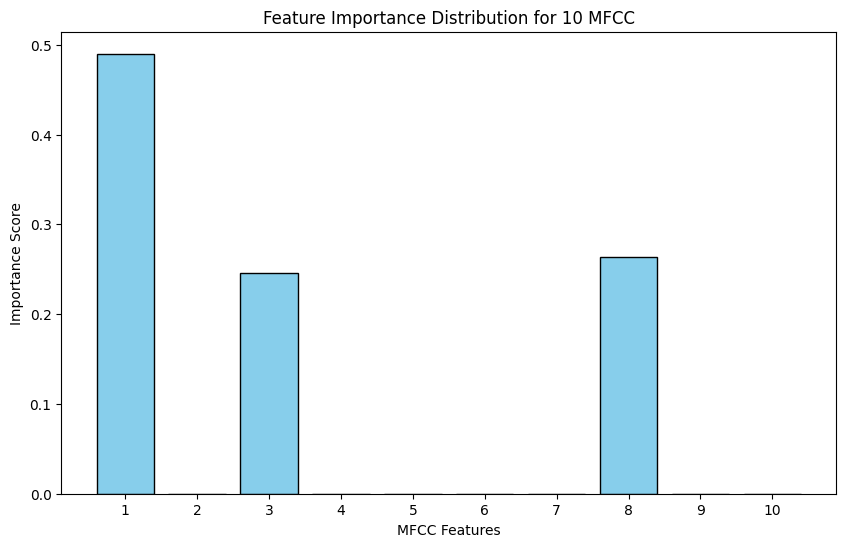

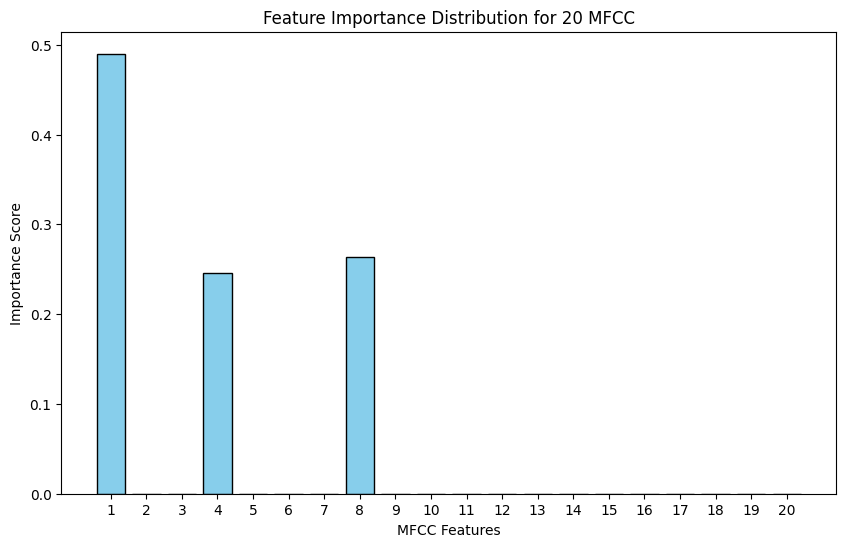

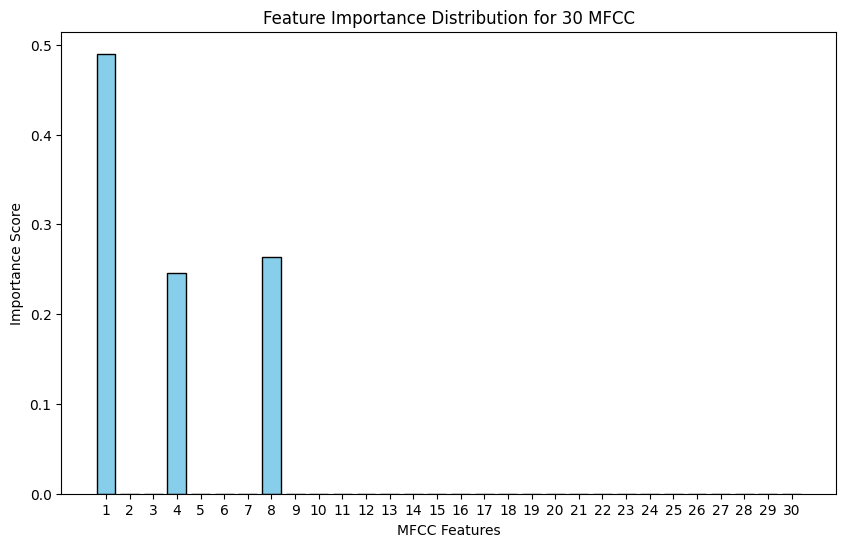

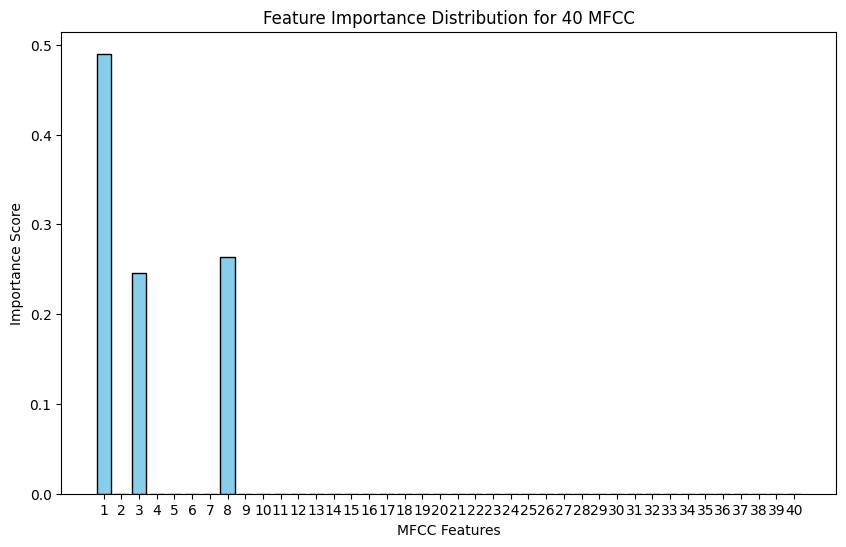

In [36]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Path to your folders on Google Drive
base_path = '/content/drive/MyDrive/CNIT581-Practicum1'
classes = ["Barkbeetle_instances2", "Cicada_instances2", "Cricket_instances2", "Termite_instances2"]

# Define a function to load all .wav files from the given folder structure
def load_audio_and_labels(base_path, classes):
    audio_clips = []
    labels = []
    for label, class_name in enumerate(classes):
        class_folder = os.path.join(base_path, class_name)
        for clip_folder in os.listdir(class_folder):
            clip_path = os.path.join(class_folder, clip_folder)
            if os.path.isdir(clip_path):  # Ensure it's a folder
                for file in os.listdir(clip_path):
                    if file.endswith('.wav'):
                        audio_clips.append(os.path.join(clip_path, file))
                        labels.append(label)
    return audio_clips, labels

# Load the audio clips and labels
audio_clips, labels = load_audio_and_labels(base_path, classes)

# Define a function to extract MFCC features
def extract_mfcc_features(audio_clips, n_mfcc):
    features = []
    for clip in audio_clips:
        y, sr = librosa.load(clip, sr=None)  # Load audio file
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        features.append(np.mean(mfcc, axis=1))  # Compute mean of MFCCs
    return np.array(features)

# Extract MFCC features for 10, 20, 30, and 40 MFCC coefficients
X_10 = extract_mfcc_features(audio_clips, 10)
X_20 = extract_mfcc_features(audio_clips, 20)
X_30 = extract_mfcc_features(audio_clips, 30)
X_40 = extract_mfcc_features(audio_clips, 40)

# Split dataset into training and test sets
X_train_10, X_test_10, y_train, y_test = train_test_split(X_10, labels, test_size=0.3, random_state=42)
X_train_20, X_test_20 = train_test_split(X_20, test_size=0.3, random_state=42)
X_train_30, X_test_30 = train_test_split(X_30, test_size=0.3, random_state=42)
X_train_40, X_test_40 = train_test_split(X_40, test_size=0.3, random_state=42)

# Define a function to compute feature importance
def compute_feature_importance(X_train, y_train):
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    importance_scores = model.feature_importances_
    return importance_scores

# Compute feature importance for each MFCC count
scores_10 = compute_feature_importance(X_train_10, y_train)
scores_20 = compute_feature_importance(X_train_20, y_train)
scores_30 = compute_feature_importance(X_train_30, y_train)
scores_40 = compute_feature_importance(X_train_40, y_train)

# Plot feature importance distribution for each MFCC count
def plot_feature_importance_distribution(scores, n_mfcc):
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(scores) + 1), scores, color='skyblue', edgecolor='black')
    plt.xlabel('MFCC Features')
    plt.ylabel('Importance Score')
    plt.title(f'Feature Importance Distribution for {n_mfcc} MFCC')
    plt.xticks(range(1, len(scores) + 1))
    plt.show()

# Plot for each MFCC count
plot_feature_importance_distribution(scores_10, 10)
plot_feature_importance_distribution(scores_20, 20)
plot_feature_importance_distribution(scores_30, 30)
plot_feature_importance_distribution(scores_40, 40)

Sum of importance scores for 10 MFCC: 1.00
Sum of importance scores for 20 MFCC: 1.00
Sum of importance scores for 30 MFCC: 1.00
Sum of importance scores for 40 MFCC: 1.00


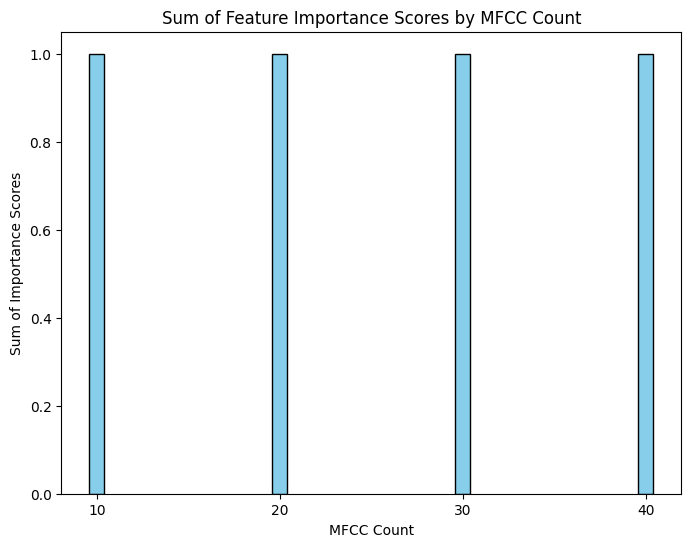

In [37]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Function to compute feature importance using Random Forest
def compute_feature_importance_rf(X_train, y_train):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    importance_scores = model.feature_importances_
    return importance_scores

# Compute feature importance for each MFCC count (10, 20, 30, 40)
scores_rf_10 = compute_feature_importance_rf(X_train_10, y_train)
scores_rf_20 = compute_feature_importance_rf(X_train_20, y_train)
scores_rf_30 = compute_feature_importance_rf(X_train_30, y_train)
scores_rf_40 = compute_feature_importance_rf(X_train_40, y_train)

# Compute the sum of the importance scores for each MFCC count
sum_importance_10 = np.sum(scores_rf_10)
sum_importance_20 = np.sum(scores_rf_20)
sum_importance_30 = np.sum(scores_rf_30)
sum_importance_40 = np.sum(scores_rf_40)

# Print the sum of importance scores for each MFCC count
print(f"Sum of importance scores for 10 MFCC: {sum_importance_10:.2f}")
print(f"Sum of importance scores for 20 MFCC: {sum_importance_20:.2f}")
print(f"Sum of importance scores for 30 MFCC: {sum_importance_30:.2f}")
print(f"Sum of importance scores for 40 MFCC: {sum_importance_40:.2f}")

# Plot the sum of importance scores for each MFCC count
mfcc_counts = [10, 20, 30, 40]
sum_importances = [sum_importance_10, sum_importance_20, sum_importance_30, sum_importance_40]

plt.figure(figsize=(8, 6))
plt.bar(mfcc_counts, sum_importances, color='skyblue', edgecolor='black')
plt.xlabel('MFCC Count')
plt.ylabel('Sum of Importance Scores')
plt.title('Sum of Feature Importance Scores by MFCC Count')
plt.xticks(mfcc_counts)
plt.show()

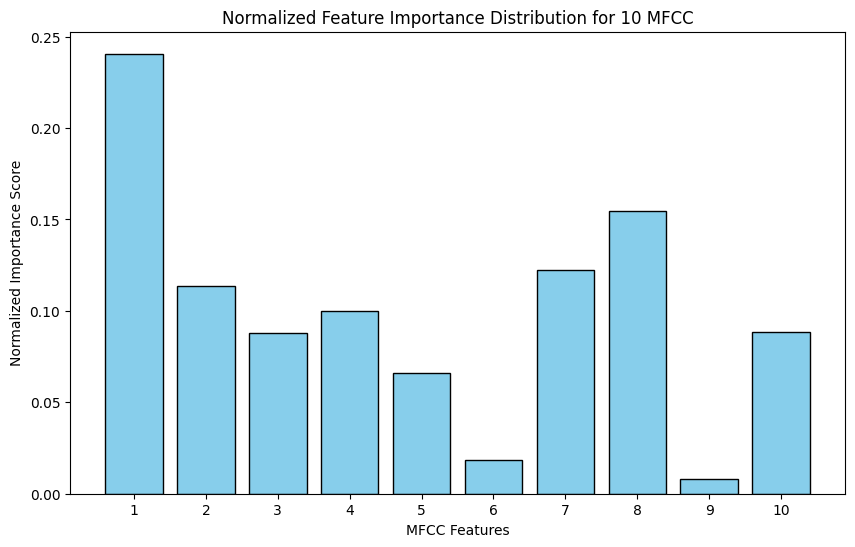

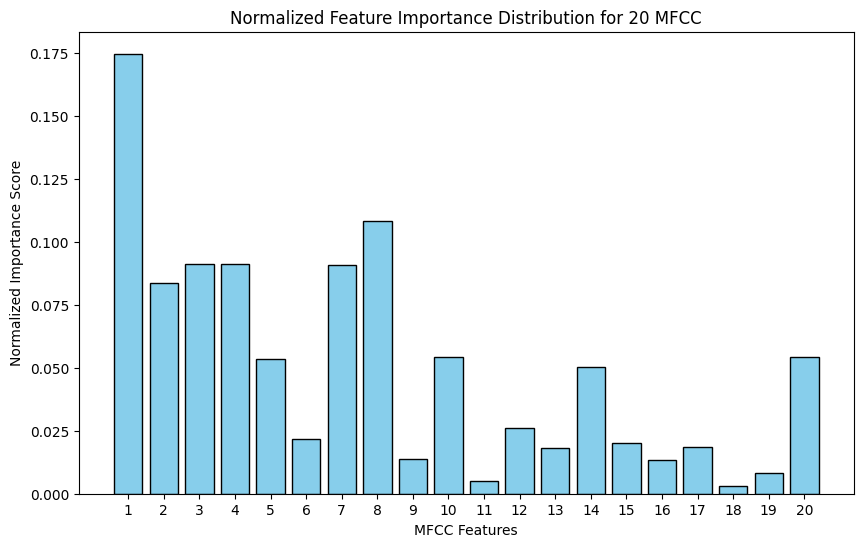

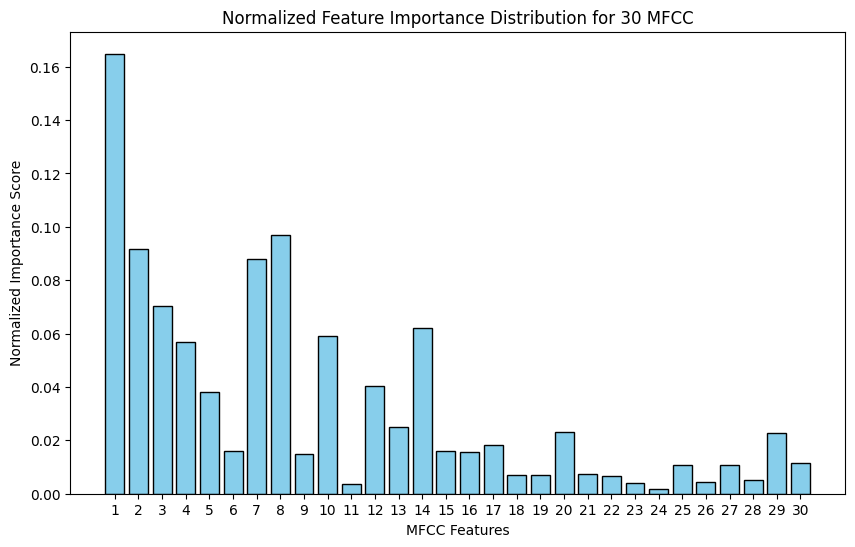

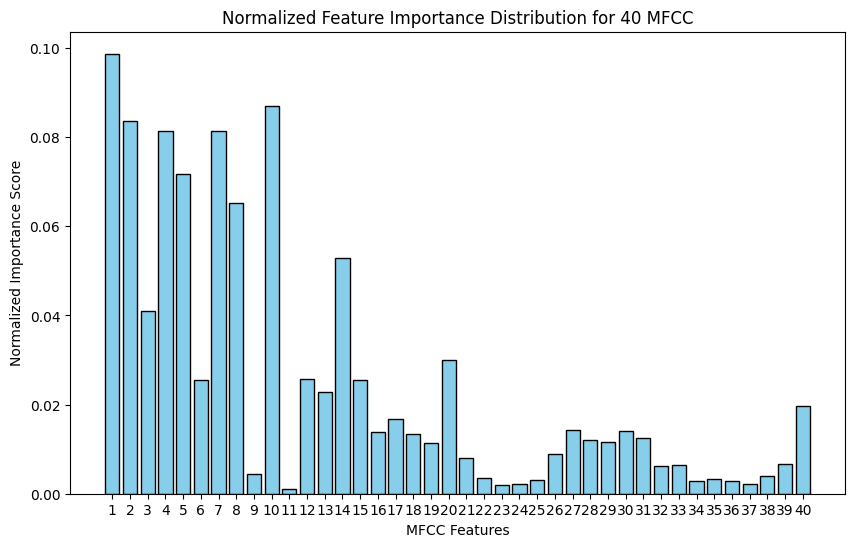

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Compute feature importance using RandomForestClassifier
def compute_feature_importance_rf(X_train, y_train):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    importance_scores = model.feature_importances_
    return importance_scores

# Compute feature importance for each MFCC count
scores_rf_10 = compute_feature_importance_rf(X_train_10, y_train)
scores_rf_20 = compute_feature_importance_rf(X_train_20, y_train)
scores_rf_30 = compute_feature_importance_rf(X_train_30, y_train)
scores_rf_40 = compute_feature_importance_rf(X_train_40, y_train)

# Normalize the importance scores by the total importance
normalized_scores_rf_10 = scores_rf_10 / np.sum(scores_rf_10)
normalized_scores_rf_20 = scores_rf_20 / np.sum(scores_rf_20)
normalized_scores_rf_30 = scores_rf_30 / np.sum(scores_rf_30)
normalized_scores_rf_40 = scores_rf_40 / np.sum(scores_rf_40)

# Plot the normalized feature importance for each MFCC count using Random Forest
def plot_normalized_importance_distribution(scores, n_mfcc):
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(scores) + 1), scores, color='skyblue', edgecolor='black')
    plt.xlabel('MFCC Features')
    plt.ylabel('Normalized Importance Score')
    plt.title(f'Normalized Feature Importance Distribution for {n_mfcc} MFCC')
    plt.xticks(range(1, len(scores) + 1))
    plt.show()

# Plot for each MFCC count
plot_normalized_importance_distribution(normalized_scores_rf_10, 10)
plot_normalized_importance_distribution(normalized_scores_rf_20, 20)
plot_normalized_importance_distribution(normalized_scores_rf_30, 30)
plot_normalized_importance_distribution(normalized_scores_rf_40, 40)

In [39]:
import os
from tabulate import tabulate

# Base directory on Google Drive
data_dir = '/content/drive/MyDrive/CNIT581-Practicum1'

# List of class folders for instances
class_folders = [
    'Barkbeetle_instances2',
    'Cicada_instances2',
    'Cricket_instances2',
    'Termite_instances2'
]

# Initialize a dictionary to hold counts for each clip in each class
class_instance_counts = {f'Clip {i}': [] for i in range(1, 6)}

# Loop through each clip and collect counts from each class folder
for clip_num in range(1, 6):  # Assuming clip1 to clip5
    clip_key = f'Clip {clip_num}'
    for folder in class_folders:
        class_path = os.path.join(data_dir, folder)
        clip_path = os.path.join(class_path, f'clip{clip_num}')
        if os.path.exists(clip_path):
            # Count files in the clip directory
            class_instance_counts[clip_key].append(len(os.listdir(clip_path)))
        else:
            class_instance_counts[clip_key].append(0)

# Prepare data for the Python table
table_data = [["Clip"] + [folder.split('_')[0].capitalize() for folder in class_folders]]
for clip_key, counts in class_instance_counts.items():
    table_data.append([clip_key] + counts)

# Display the table
print(tabulate(table_data, headers="firstrow", tablefmt="grid"))

+--------+--------------+----------+-----------+-----------+
| Clip   |   Barkbeetle |   Cicada |   Cricket |   Termite |
+========+==============+==========+===========+===========+
| Clip 1 |           21 |        8 |         4 |         6 |
+--------+--------------+----------+-----------+-----------+
| Clip 2 |           16 |        3 |         5 |         5 |
+--------+--------------+----------+-----------+-----------+
| Clip 3 |           21 |        9 |         7 |        15 |
+--------+--------------+----------+-----------+-----------+
| Clip 4 |           18 |        9 |         7 |         6 |
+--------+--------------+----------+-----------+-----------+
| Clip 5 |           21 |        7 |         7 |         5 |
+--------+--------------+----------+-----------+-----------+


11/20 UPDATE

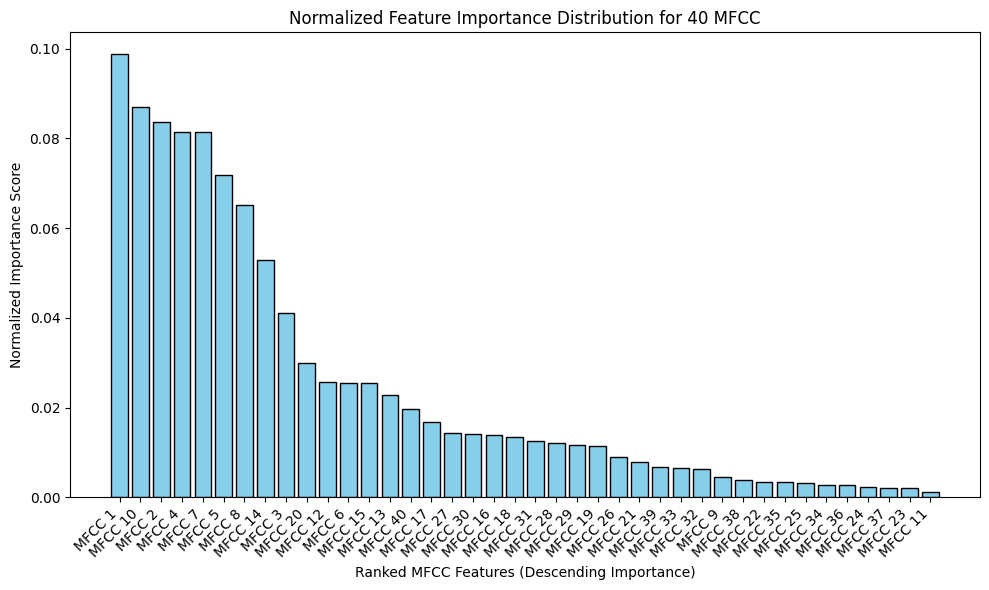

In [40]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Compute feature importance using RandomForestClassifier
def compute_feature_importance_rf(X_train, y_train):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    importance_scores = model.feature_importances_
    return importance_scores

# Compute feature importance for 40 MFCC
scores_rf_40 = compute_feature_importance_rf(X_train_40, y_train)

# Normalize the importance scores by the total importance
normalized_scores_rf_40 = scores_rf_40 / np.sum(scores_rf_40)

# Sort the scores in descending order along with their feature indices
sorted_indices = np.argsort(normalized_scores_rf_40)[::-1]
sorted_scores_rf_40 = normalized_scores_rf_40[sorted_indices]

# Plot the normalized feature importance for 40 MFCC in descending order
def plot_normalized_importance_distribution(scores, indices, n_mfcc):
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(scores) + 1), scores, color='skyblue', edgecolor='black')
    plt.xlabel('Ranked MFCC Features (Descending Importance)')
    plt.ylabel('Normalized Importance Score')
    plt.title(f'Normalized Feature Importance Distribution for {n_mfcc} MFCC')
    plt.xticks(range(1, len(scores) + 1), [f'MFCC {i+1}' for i in indices], rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot for 40 MFCC
plot_normalized_importance_distribution(sorted_scores_rf_40, sorted_indices, 40)

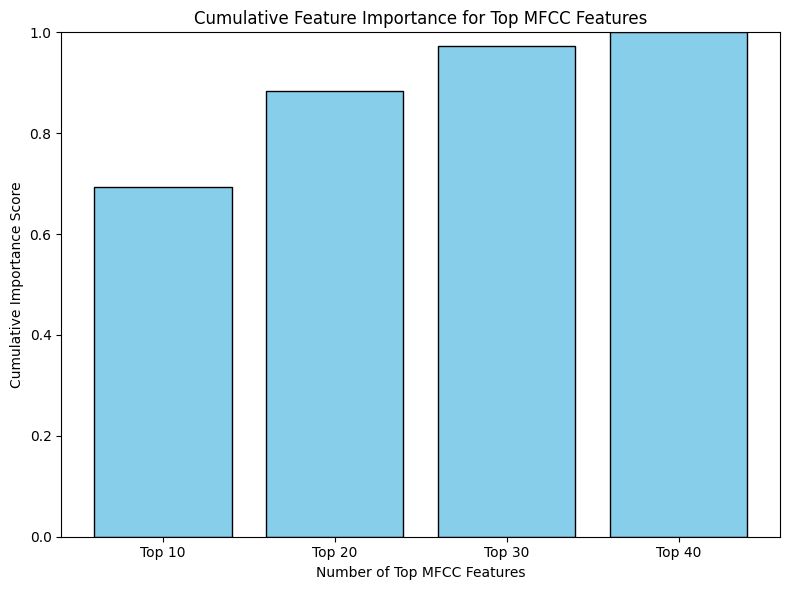

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Compute feature importance using RandomForestClassifier
def compute_feature_importance_rf(X_train, y_train):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    importance_scores = model.feature_importances_
    return importance_scores

# Compute feature importance for 40 MFCC
scores_rf_40 = compute_feature_importance_rf(X_train_40, y_train)

# Normalize the importance scores by the total importance
normalized_scores_rf_40 = scores_rf_40 / np.sum(scores_rf_40)

# Sort the scores in descending order
sorted_scores_rf_40 = np.sort(normalized_scores_rf_40)[::-1]

# Compute cumulative importance for top 10, 20, 30, and 40 features
cumulative_importance = [
    np.sum(sorted_scores_rf_40[:10]),
    np.sum(sorted_scores_rf_40[:20]),
    np.sum(sorted_scores_rf_40[:30]),
    np.sum(sorted_scores_rf_40[:40]),
]

# Plot cumulative importance
x_labels = ['Top 10', 'Top 20', 'Top 30', 'Top 40']
plt.figure(figsize=(8, 6))
plt.bar(x_labels, cumulative_importance, color='skyblue', edgecolor='black')
plt.xlabel('Number of Top MFCC Features')
plt.ylabel('Cumulative Importance Score')
plt.title('Cumulative Feature Importance for Top MFCC Features')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


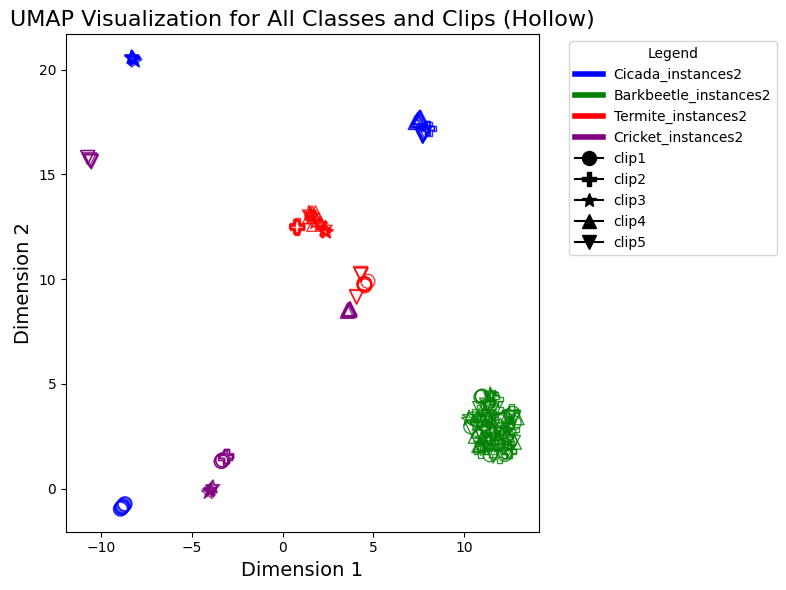

In [42]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
import umap
import seaborn as sns
from matplotlib.lines import Line2D

# Define the color and marker scheme
class_colors = {
    "Cicada_instances2": "blue",
    "Barkbeetle_instances2": "green",
    "Termite_instances2": "red",
    "Cricket_instances2": "purple"
}
clip_markers = {
    "clip1": "o",  # Circle
    "clip2": "P",  # Plus
    "clip3": "*",  # Star
    "clip4": "^",  # Triangle Up
    "clip5": "v"   # Triangle Down
}

# Function to plot UMAP for all classes together (hollow markers)
def plot_umap_all_classes(class_features):
    reducer = umap.UMAP(n_components=2, random_state=42)
    all_features = []
    all_labels = []
    all_colors = []
    all_markers = []

    # Aggregate features, colors, and markers for all classes
    for insect_class, (features, clip_labels) in class_features.items():
        for i, feature in enumerate(features):
            all_features.append(feature)
            clip_label = clip_labels[i]
            all_labels.append(insect_class)  # Store the class label
            all_colors.append(class_colors[insect_class])
            all_markers.append(clip_markers.get(clip_label, "o"))  # Default to circle if unknown clip

    # Reduce dimensions with UMAP
    reduced_features = reducer.fit_transform(np.array(all_features))

    # Plot
    plt.figure(figsize=(8, 6))
    for i, (x, y) in enumerate(reduced_features):
        plt.scatter(
            x,
            y,
            facecolors="none",  # Hollow markers
            edgecolors=all_colors[i],  # Outline color
            marker=all_markers[i],  # Marker style
            s=100,
            alpha=0.8,
            label=all_labels[i] if i == 0 else ""  # Avoid duplicate labels in legend
        )

    # Create custom legends for classes and clips
    class_legend = [Line2D([0], [0], color=color, lw=4, label=cls) for cls, color in class_colors.items()]
    clip_legend = [Line2D([0], [0], color='black', marker=marker, markersize=10, label=clip)
                   for clip, marker in clip_markers.items()]
    plt.legend(handles=class_legend + clip_legend, bbox_to_anchor=(1.05, 1), loc="upper left", title="Legend")

    plt.title("UMAP Visualization for All Classes and Clips (Hollow)", fontsize=16)
    plt.xlabel("Dimension 1", fontsize=14)
    plt.ylabel("Dimension 2", fontsize=14)
    plt.tight_layout()
    plt.show()

# Plot UMAP for all classes with hollow markers
plot_umap_all_classes(class_features)

FINAL UPDATE

In [43]:
!pip install pydub
!apt-get install ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [44]:
import os
import librosa
from pydub import AudioSegment

# Paths
data_dir = '/content/drive/MyDrive/CNIT581-Practicum1'
class_folders = [
    'Barkbeetle_instances2',
    'Cicada_instances2',
    'Cricket_instances2',
    'Termite_instances2'
]

# Create new folders for augmented data
augmented_folders = [
    'Barkbeetle_instances3',
    'Cicada_instances3',
    'Cricket_instances3',
    'Termite_instances3'
]

# Create new class paths for augmented data
augmented_class_paths = {folder.split('_')[0]: os.path.join(data_dir, folder.replace('2', '3')) for folder in class_folders}

# Create the augmented directories if they don't exist
for folder in augmented_folders:
    folder_path = os.path.join(data_dir, folder)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

# Function to augment audio using pydub
def augment_audio_with_pydub(audio, sr, time_rate=1.2, pitch_steps=2):
    try:
        # Convert to pydub AudioSegment
        audio_segment = AudioSegment(
            audio.tobytes(),
            frame_rate=sr,
            sample_width=audio.dtype.itemsize,
            channels=1
        )

        # Apply time stretching by speeding up/slowing down
        audio_stretched = audio_segment.speedup(playback_speed=time_rate)

        # Apply pitch shifting by changing the frame rate
        new_frame_rate = int(sr * (2 ** (pitch_steps / 12.0)))  # pitch shifting in semi-tones
        audio_pitched = audio_stretched.set_frame_rate(new_frame_rate)

        return audio_pitched
    except Exception as e:
        print(f"Error augmenting audio: {e}")
        return audio_segment  # Return original if error occurs

# Process each class (e.g., Barkbeetle, Cicada, etc.)
for class_name, class_folder in zip(['Barkbeetle', 'Cicada', 'Cricket', 'Termite'], class_folders):
    print(f"\nProcessing {class_name}...")

    # Get path for original data and new augmented data
    original_class_path = os.path.join(data_dir, class_folder)
    augmented_class_path = augmented_class_paths[class_name]

    # Iterate through all clips and segments in the class folder
    for clip_name in os.listdir(original_class_path):
        clip_path = os.path.join(original_class_path, clip_name)

        if os.path.isdir(clip_path):
            for file_name in os.listdir(clip_path):
                if file_name.endswith('.wav'):
                    file_path = os.path.join(clip_path, file_name)

                    try:
                        # Load the audio file using librosa
                        audio, sr = librosa.load(file_path, sr=None)

                        # Perform augmentation using pydub
                        augmented_audio = augment_audio_with_pydub(audio, sr)

                        # Save augmented audio to new directory
                        augmented_file_path = os.path.join(augmented_class_path, clip_name, file_name)
                        os.makedirs(os.path.dirname(augmented_file_path), exist_ok=True)
                        augmented_audio.export(augmented_file_path, format="wav")

                        print(f"Saved augmented file: {augmented_file_path}")

                    except Exception as e:
                        print(f"Error processing {file_name}: {e}")



Processing Barkbeetle...
Saved augmented file: /content/drive/MyDrive/CNIT581-Practicum1/Barkbeetle_instances3/clip5/seg30.wav
Saved augmented file: /content/drive/MyDrive/CNIT581-Practicum1/Barkbeetle_instances3/clip5/seg35.wav
Saved augmented file: /content/drive/MyDrive/CNIT581-Practicum1/Barkbeetle_instances3/clip5/seg31.wav
Saved augmented file: /content/drive/MyDrive/CNIT581-Practicum1/Barkbeetle_instances3/clip5/seg29.wav
Saved augmented file: /content/drive/MyDrive/CNIT581-Practicum1/Barkbeetle_instances3/clip5/seg33.wav
Saved augmented file: /content/drive/MyDrive/CNIT581-Practicum1/Barkbeetle_instances3/clip5/seg32.wav
Saved augmented file: /content/drive/MyDrive/CNIT581-Practicum1/Barkbeetle_instances3/clip5/seg34.wav
Saved augmented file: /content/drive/MyDrive/CNIT581-Practicum1/Barkbeetle_instances3/clip5/seg32-2.wav
Saved augmented file: /content/drive/MyDrive/CNIT581-Practicum1/Barkbeetle_instances3/clip5/seg31-2.wav
Saved augmented file: /content/drive/MyDrive/CNIT581

Orginal clips

In [45]:
import os
import librosa
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Paths for original data (replace with your actual paths)
data_dir = '/content/drive/MyDrive/CNIT581-Practicum1'
original_class_paths = {
    'Barkbeetle': os.path.join(data_dir, 'Barkbeetle_instances2'),
    'Cicada': os.path.join(data_dir, 'Cicada_instances2'),
    'Cricket': os.path.join(data_dir, 'Cricket_instances2'),
    'Termite': os.path.join(data_dir, 'Termite_instances2')
}

# Define the different conditions for train-test splits
conditions = [
    (['clip1', 'clip2', 'clip3', 'clip4'], 'clip5'),
    (['clip2', 'clip3', 'clip4', 'clip5'], 'clip1'),
    (['clip1', 'clip3', 'clip4', 'clip5'], 'clip2'),
    (['clip1', 'clip2', 'clip4', 'clip5'], 'clip3'),
    (['clip1', 'clip2', 'clip3', 'clip5'], 'clip4')
]

# Function to filter data based on selected clips
def filter_data(class_paths, train_clips, test_clip):
    X_train, y_train, X_test, y_test = [], [], [], []

    for label, path in class_paths.items():
        for clip in train_clips:
            clip_path = os.path.join(path, clip)
            if os.path.isdir(clip_path):
                for file_name in os.listdir(clip_path):
                    file_path = os.path.join(clip_path, file_name)
                    if file_name.endswith('.wav'):
                        audio, sr = librosa.load(file_path, sr=None)
                        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
                        mfccs_mean = np.mean(mfccs, axis=1)
                        X_train.append(mfccs_mean)
                        y_train.append(label)

        # Test clip
        test_clip_path = os.path.join(path, test_clip)
        if os.path.isdir(test_clip_path):
            for file_name in os.listdir(test_clip_path):
                file_path = os.path.join(test_clip_path, file_name)
                if file_name.endswith('.wav'):
                    audio, sr = librosa.load(file_path, sr=None)
                    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
                    mfccs_mean = np.mean(mfccs, axis=1)
                    X_test.append(mfccs_mean)
                    y_test.append(label)

    # Convert lists to numpy arrays
    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

# Initialize a dictionary to store accuracy for each model
model_accuracies = {
    'Decision Tree': [],
    'Random Forest': [],
    'XGBoost': [],
    'KNN': [],
    'SVM RBF': []
}

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Loop over each condition and evaluate the models
for i, (train_clips, test_clip) in enumerate(conditions, start=1):
    print(f"\nCondition {i}: Training on {train_clips} and testing on {test_clip}")

    # Filter data for the current train-test split
    X_train, y_train, X_test, y_test = filter_data(original_class_paths, train_clips, test_clip)

    # Encode the labels to numeric values
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

    # List of models to compare
    models = {
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'XGBoost': XGBClassifier(),
        'KNN': KNeighborsClassifier(),
        'SVM RBF': SVC(kernel='rbf')
    }

    # Loop through each model and calculate accuracy
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Test the model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Store the accuracy for this model and condition
        model_accuracies[model_name].append(accuracy)

        print(f"{model_name} Accuracy for Condition {i}: {accuracy:.2f}")

# Calculate and display the average accuracy for each model
print("\nAverage Accuracy for Each Model:")
for model_name, accuracies in model_accuracies.items():
    avg_accuracy = np.mean(accuracies)
    print(f"{model_name}: {avg_accuracy:.2f}")



Condition 1: Training on ['clip1', 'clip2', 'clip3', 'clip4'] and testing on clip5
Decision Tree Accuracy for Condition 1: 0.95
Random Forest Accuracy for Condition 1: 1.00
XGBoost Accuracy for Condition 1: 1.00
KNN Accuracy for Condition 1: 1.00
SVM RBF Accuracy for Condition 1: 0.95

Condition 2: Training on ['clip2', 'clip3', 'clip4', 'clip5'] and testing on clip1
Decision Tree Accuracy for Condition 2: 0.79
Random Forest Accuracy for Condition 2: 1.00
XGBoost Accuracy for Condition 2: 0.79
KNN Accuracy for Condition 2: 1.00
SVM RBF Accuracy for Condition 2: 1.00

Condition 3: Training on ['clip1', 'clip3', 'clip4', 'clip5'] and testing on clip2
Decision Tree Accuracy for Condition 3: 0.90
Random Forest Accuracy for Condition 3: 0.97
XGBoost Accuracy for Condition 3: 0.90
KNN Accuracy for Condition 3: 1.00
SVM RBF Accuracy for Condition 3: 0.83

Condition 4: Training on ['clip1', 'clip2', 'clip4', 'clip5'] and testing on clip3
Decision Tree Accuracy for Condition 4: 0.87
Random For

Augmented Clips

In [46]:
import os
import librosa
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Paths for augmented data (replace with your actual paths)
data_dir = '/content/drive/MyDrive/CNIT581-Practicum1'
augmented_class_paths = {
    'Barkbeetle': os.path.join(data_dir, 'Barkbeetle_instances3'),
    'Cicada': os.path.join(data_dir, 'Cicada_instances3'),
    'Cricket': os.path.join(data_dir, 'Cricket_instances3'),
    'Termite': os.path.join(data_dir, 'Termite_instances3')
}

# Define the different conditions for train-test splits
conditions = [
    (['clip1', 'clip2', 'clip3', 'clip4'], 'clip5'),
    (['clip2', 'clip3', 'clip4', 'clip5'], 'clip1'),
    (['clip1', 'clip3', 'clip4', 'clip5'], 'clip2'),
    (['clip1', 'clip2', 'clip4', 'clip5'], 'clip3'),
    (['clip1', 'clip2', 'clip3', 'clip5'], 'clip4')
]

# Function to filter data based on selected clips
def filter_data(class_paths, train_clips, test_clip):
    X_train, y_train, X_test, y_test = [], [], [], []

    for label, path in class_paths.items():
        for clip in train_clips:
            clip_path = os.path.join(path, clip)
            if os.path.isdir(clip_path):
                for file_name in os.listdir(clip_path):
                    file_path = os.path.join(clip_path, file_name)
                    if file_name.endswith('.wav'):
                        audio, sr = librosa.load(file_path, sr=None)
                        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
                        mfccs_mean = np.mean(mfccs, axis=1)
                        X_train.append(mfccs_mean)
                        y_train.append(label)

        # Test clip
        test_clip_path = os.path.join(path, test_clip)
        if os.path.isdir(test_clip_path):
            for file_name in os.listdir(test_clip_path):
                file_path = os.path.join(test_clip_path, file_name)
                if file_name.endswith('.wav'):
                    audio, sr = librosa.load(file_path, sr=None)
                    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
                    mfccs_mean = np.mean(mfccs, axis=1)
                    X_test.append(mfccs_mean)
                    y_test.append(label)

    # Convert lists to numpy arrays
    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

# Initialize a dictionary to store accuracy for each model
model_accuracies = {
    'Decision Tree': [],
    'Random Forest': [],
    'XGBoost': [],
    'KNN': [],
    'SVM RBF': []
}

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Loop over each condition and evaluate the models
for i, (train_clips, test_clip) in enumerate(conditions, start=1):
    print(f"\nCondition {i}: Training on {train_clips} and testing on {test_clip}")

    # Filter data for the current train-test split
    X_train, y_train, X_test, y_test = filter_data(augmented_class_paths, train_clips, test_clip)

    # Encode the labels to numeric values
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

    # List of models to compare
    models = {
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'XGBoost': XGBClassifier(),
        'KNN': KNeighborsClassifier(),
        'SVM RBF': SVC(kernel='rbf')
    }

    # Loop through each model and calculate accuracy
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Test the model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Store the accuracy for this model and condition
        model_accuracies[model_name].append(accuracy)

        print(f"{model_name} Accuracy for Condition {i}: {accuracy:.2f}")

# Calculate and display the average accuracy for each model
print("\nAverage Accuracy for Each Model:")
for model_name, accuracies in model_accuracies.items():
    avg_accuracy = np.mean(accuracies)
    print(f"{model_name}: {avg_accuracy:.2f}")



Condition 1: Training on ['clip1', 'clip2', 'clip3', 'clip4'] and testing on clip5
Decision Tree Accuracy for Condition 1: 0.53
Random Forest Accuracy for Condition 1: 0.68
XGBoost Accuracy for Condition 1: 0.65
KNN Accuracy for Condition 1: 0.82
SVM RBF Accuracy for Condition 1: 0.82

Condition 2: Training on ['clip2', 'clip3', 'clip4', 'clip5'] and testing on clip1
Decision Tree Accuracy for Condition 2: 0.46
Random Forest Accuracy for Condition 2: 0.59
XGBoost Accuracy for Condition 2: 0.38
KNN Accuracy for Condition 2: 0.85
SVM RBF Accuracy for Condition 2: 0.85

Condition 3: Training on ['clip1', 'clip3', 'clip4', 'clip5'] and testing on clip2
Decision Tree Accuracy for Condition 3: 0.83
Random Forest Accuracy for Condition 3: 0.72
XGBoost Accuracy for Condition 3: 0.72
KNN Accuracy for Condition 3: 0.72
SVM RBF Accuracy for Condition 3: 0.72

Condition 4: Training on ['clip1', 'clip2', 'clip4', 'clip5'] and testing on clip3
Decision Tree Accuracy for Condition 4: 0.87
Random For

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


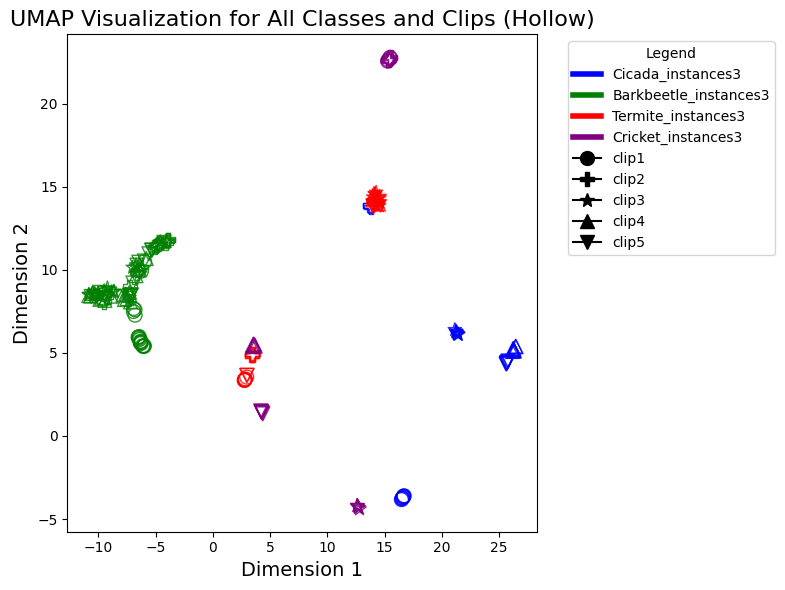

In [50]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
import umap
from matplotlib.lines import Line2D

# Define the folders and classes
base_path = "/content/drive/MyDrive/CNIT581-Practicum1"
class_folders = {
    "Cicada_instances3": "blue",
    "Barkbeetle_instances3": "green",
    "Termite_instances3": "red",
    "Cricket_instances3": "purple"
}

clip_markers = {
    "clip1": "o",  # Circle
    "clip2": "P",  # Plus
    "clip3": "*",  # Star
    "clip4": "^",  # Triangle Up
    "clip5": "v"   # Triangle Down
}

# Function to load audio files and extract MFCC features
def extract_features_nested(folder_path, n_mfcc=40):
    features = []
    clip_labels = []

    # Traverse subfolders (clip1, clip2, ...)
    for clip_folder in os.listdir(folder_path):
        clip_path = os.path.join(folder_path, clip_folder)
        if os.path.isdir(clip_path):  # Ensure it's a directory
            for file in os.listdir(clip_path):
                if file.endswith(".wav"):
                    file_path = os.path.join(clip_path, file)
                    try:
                        # Load audio
                        y, sr = librosa.load(file_path, sr=None)
                        # Extract MFCC features
                        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
                        # Take the mean across time for each coefficient
                        mfcc_mean = np.mean(mfcc, axis=1)
                        features.append(mfcc_mean)
                        # Assign clip label based on the parent folder name
                        clip_labels.append(clip_folder)
                    except Exception as e:
                        print(f"Error processing {file}: {e}")

    return features, clip_labels

# Load features for all classes
class_features = {}
for class_name, color in class_folders.items():
    folder_path = os.path.join(base_path, class_name)
    features, clip_labels = extract_features_nested(folder_path)
    if features:  # Only add classes with non-empty features
        class_features[class_name] = (features, clip_labels)
    else:
        print(f"Warning: No valid features extracted for {class_name}.")

# UMAP visualization function
def plot_umap_all_classes(class_features):
    reducer = umap.UMAP(n_components=2, random_state=42)
    all_features = []
    all_labels = []
    all_colors = []
    all_markers = []

    # Aggregate features, colors, and markers for all classes
    for insect_class, (features, clip_labels) in class_features.items():
        for i, feature in enumerate(features):
            all_features.append(feature)
            clip_label = clip_labels[i]
            all_labels.append(insect_class)  # Store the class label
            all_colors.append(class_folders[insect_class])
            all_markers.append(clip_markers.get(clip_label, "o"))  # Default to circle if unknown clip

    if not all_features:  # Check if there are features to process
        print("Error: No features to plot. Check your data and feature extraction.")
        return

    # Reduce dimensions with UMAP
    reduced_features = reducer.fit_transform(np.array(all_features))

    # Plot
    plt.figure(figsize=(8, 6))
    for i, (x, y) in enumerate(reduced_features):
        plt.scatter(
            x,
            y,
            facecolors="none",  # Hollow markers
            edgecolors=all_colors[i],  # Outline color
            marker=all_markers[i],  # Marker style
            s=100,
            alpha=0.8,
        )

    # Create custom legends for classes and clips
    class_legend = [Line2D([0], [0], color=color, lw=4, label=cls) for cls, color in class_folders.items()]
    clip_legend = [Line2D([0], [0], color='black', marker=marker, markersize=10, label=clip)
                   for clip, marker in clip_markers.items()]
    plt.legend(handles=class_legend + clip_legend, bbox_to_anchor=(1.05, 1), loc="upper left", title="Legend")

    plt.title("UMAP Visualization for All Classes and Clips (Hollow)", fontsize=16)
    plt.xlabel("Dimension 1", fontsize=14)
    plt.ylabel("Dimension 2", fontsize=14)
    plt.tight_layout()
    plt.show()

# Plot UMAP for all classes with hollow markers
plot_umap_all_classes(class_features)